In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import datetime

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Modelling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objects as go

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (16, 9)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import ipywidgets
from ipywidgets import interact


# !pip install squarify
import squarify as sq

In [2]:
df=pd.read_excel(r'C:\\Users\\HP\\Downloads\\sales_data.xlsx')
df.head(500)

CustomerID  TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0            22           124 11986.54                96.67            529.59   
1            29            82 11025.96               134.46             97.92   
2            83            43  7259.69               168.83            171.69   
3            95            44  6992.27               158.92             92.82   
4           124            55  6263.44               113.88            179.04   
5           153            49  5841.24               119.21             96.84   
6           187            43  5470.27               127.22            128.77   
7           219            54  5200.53                96.31            237.53   
8           258            19  4967.06               261.42             51.91   
9           308            21  4726.38               225.07             63.88   
10          491            37  3934.05               106.33            162.50   
11          492            20  3933.82               196.69             74.87   
12          572            21  3778.07               179.91             91.07   
13          595            34  3725.48               109.57            115.78   
14          613            31  3660.12               118.07            114.77   
15          669            28  3547.93               126.71             61.68   
16          671            31  3547.70               114.44            150.70   
17          740            11  3401.97               309.27             45.87   
18          750            20  3391.09               169.55             61.89   
19          785            15  3322.83               221.52             45.93   
20          795            29  3305.80               113.99            103.80   
21          806            13  3287.77               252.91             42.92   
22          854            13  3224.55               248.04             24.95   
23          864            19  3211.35               169.02             84.85   
24          902            14  3149.69               224.98             30.94   
25          928            18  3113.08               172.95             50.48   
26          947            18  3088.26               171.57             33.66   
27          972            24  3060.53               127.52            125.78   
28         1000            22  3027.11               137.60             69.86   
29         1075            24  2944.71               122.70             96.81   
30         1146            28  2865.89               102.35            110.79   
31         1399            31  2659.31                85.78            102.81   
32         1468            13  2612.35               200.95             51.35   
33         1472            19  2609.00               137.32             78.85   
34         1481            11  2604.78               236.80             20.33   
35         1573            23  2555.27               111.10            102.82   
36         1589            18  2544.48               141.36             53.98   
37         1610            22  2534.23               115.19             89.83   
38         1621            21  2530.55               120.50             54.85   
39         1717            27  2475.84                91.70             61.89   
40         1721            29  2469.36                85.15             98.81   
41         1787            26  2432.01                93.54             66.86   
42         1819            20  2416.13               120.81             36.93   
43         1851            13  2402.91               184.84             52.91   
44         1873            18  2390.84               132.82             88.84   
45         1885            24  2386.87                99.45             72.87   
46         2016             9  2327.53               258.61              9.98   
47         2096            20  2277.34               113.87             81.84   
48         2109            40  2274.

In [3]:
data=df.drop("CustomerID",axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TOTAL_ORDERS               5000 non-null   int64         
 1   REVENUE                    5000 non-null   float64       
 2   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 3   CARRIAGE_REVENUE           5000 non-null   float64       
 4   AVERAGESHIPPING            5000 non-null   float64       
 5   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 6   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 7   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 8   DAYSSINCELASTORDER         5000 non-null   int64         
 9   MONDAY_ORDERS              5000 non-null   int64         
 10  TUESDAY_ORDERS             5000 non-null   int64         
 11  WEDNESDAY_ORDERS           5000 non-null   int64         
 12  THURSD

df.isnull().sum()

In [5]:
data.describe()

TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
count       5000.00  5000.00              5000.00           5000.00   
mean          12.87  1681.52               136.54             46.04   
std           12.68  1998.62                91.65             47.88   
min            1.00    38.50                10.68              0.00   
25%            3.00   315.10                83.03              9.98   
50%            8.00   966.73               113.16             24.98   
75%           20.00  2493.07               160.27             76.86   
max          156.00 34847.40              1578.88            529.59   

       AVERAGESHIPPING  AVGDAYSBETWEENORDERS  DAYSSINCELASTORDER  \
count          5000.00               5000.00             5000.00   
mean              3.59                163.16               87.42   
std               2.02                259.70               80.16   
min               0.00                  0.00                1.00   
25%               2.50                 21.67                7.00   
50%               3.66                 57.64               68.00   
75%               4.79                170.36              171.25   
max              35.99               1409.50              207.00   

       MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  THURSDAY_ORDERS  \
count        5000.00         5000.00           5000.00          5000.00   
mean            1.63            1.75              1.80             2.13   
std             2.24            2.43              2.46             2.47   
min             0.00            0.00              0.00             0.00   
25%             0.00            0.00              0.00             0.00   
50%             1.00            1.00              1.00             1.00   
75%             2.00            3.00              3.00             3.00   
max            19.00           23.00             29.00            32.00   

       FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  MONDAY_REVENUE  \
count        5000.00          5000.00        5000.00         5000.00   
mean            1.95             1.68           1.93          215.21   
std             2.65             2.45           2.32          397.83   
min             0.00             0.00           0.00            0.00   
25%             0.00             0.00           0.00            0.00   
50%             1.00             1.00           1.00           74.99   
75%             3.00             3.00           3.00          286.87   
max            26.00            31.00          23.00        12819.41   

       TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  FRIDAY_REVENUE  \
count          5000.00            5000.00           5000.00         5000.00   
mean            233.51             235.69            265.95          250.58   
std             411.94             397.86            383.89          400.54   
min               0.00               0.00              0.00            0.00   
25%               0.00               0.00              0.00            0.00   
50%              75.99              80.99            144.59           91.19   
75%             310.97             319.99            344.36          352.74   
max            7853.92            5877.44           6434.95         6855.22   

       SATURDAY_REVENUE  SUNDAY_REVENUE  WEEK1_DAY01_DAY07_ORDERS  \
count           5000.00         5000.00                   5000.00   
mean             219.64          260.94                      3.00   
std              376.14          406.93                      3.26   
min                0.00            0.00                      0.00   
25%                0.00            0.00                      1.00   
50%               62.42          135.99                      2.00   
75%              297.28          341.37                      4.00   
max             4642.97         8366.35                     32.00   

       WEEK2_DAY08_DAY15_ORDERS  WEEK3_DAY16_DAY23_ORDERS  \
count                   5000.00   

# In data analysis What all things we do
1.Missing Vlues
2.Explore About the numerical Variables
3.fiding relaonship betwwen feaures

In [6]:
data.isnull().sum()

TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_0000_0600_ORDERS        0
TIME_060

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='TOTAL_ORDERS', ylabel='REVENUE'>

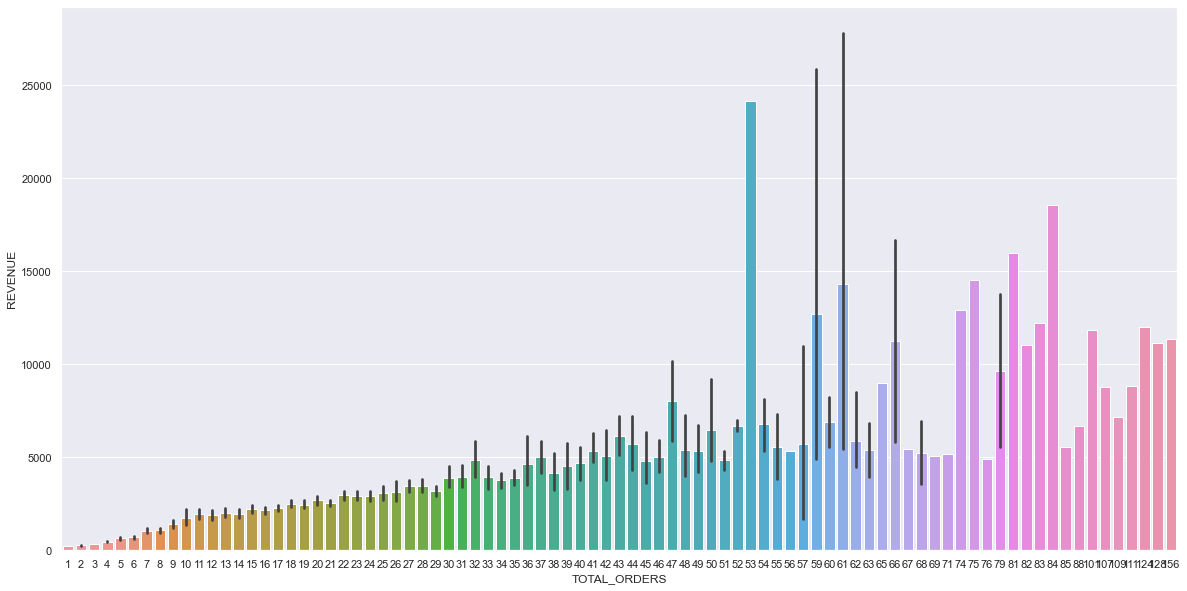

In [8]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(data=data ,x="TOTAL_ORDERS",y="REVENUE")


<AxesSubplot:xlabel='TOTAL_ORDERS', ylabel='AVERAGESHIPPING'>

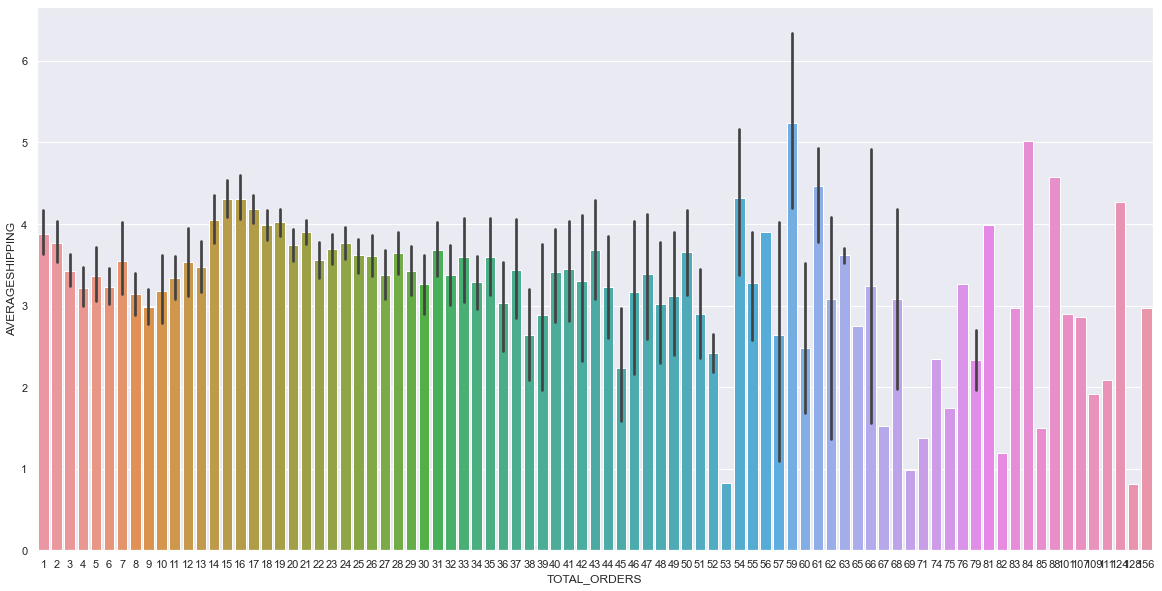

In [9]:
sns.barplot(data=data ,x="TOTAL_ORDERS",y="AVERAGESHIPPING")

<AxesSubplot:xlabel='TOTAL_ORDERS', ylabel='CARRIAGE_REVENUE'>

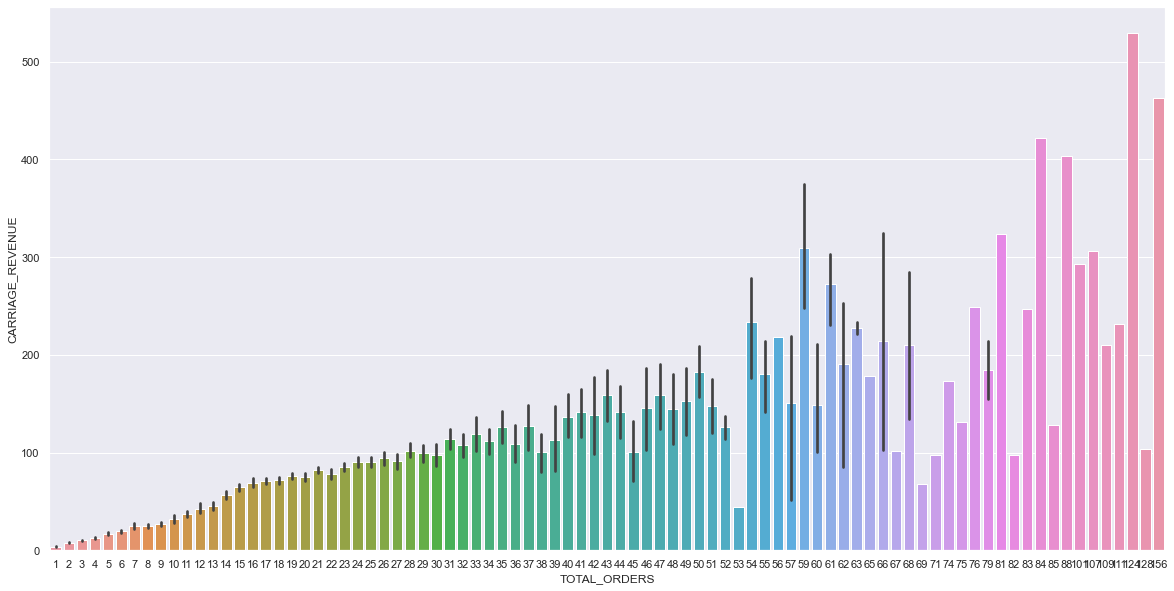

In [10]:
sns.barplot(data=data ,x="TOTAL_ORDERS",y="CARRIAGE_REVENUE")

<AxesSubplot:xlabel='WEEK1_DAY01_DAY07_ORDERS', ylabel='WEEK1_DAY01_DAY07_REVENUE'>

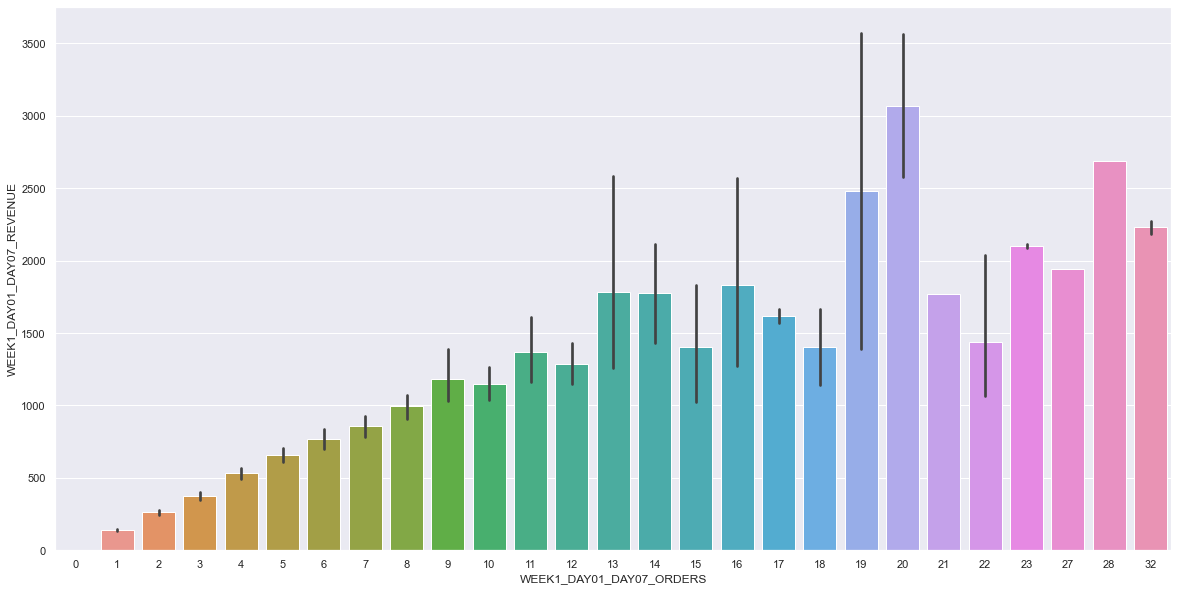

In [11]:
sns.barplot(data=data ,x="WEEK1_DAY01_DAY07_ORDERS",y="WEEK1_DAY01_DAY07_REVENUE")

<AxesSubplot:xlabel='WEEK4_DAY24_DAY31_ORDERS', ylabel='WEEK4_DAY24_DAY31_REVENUE'>

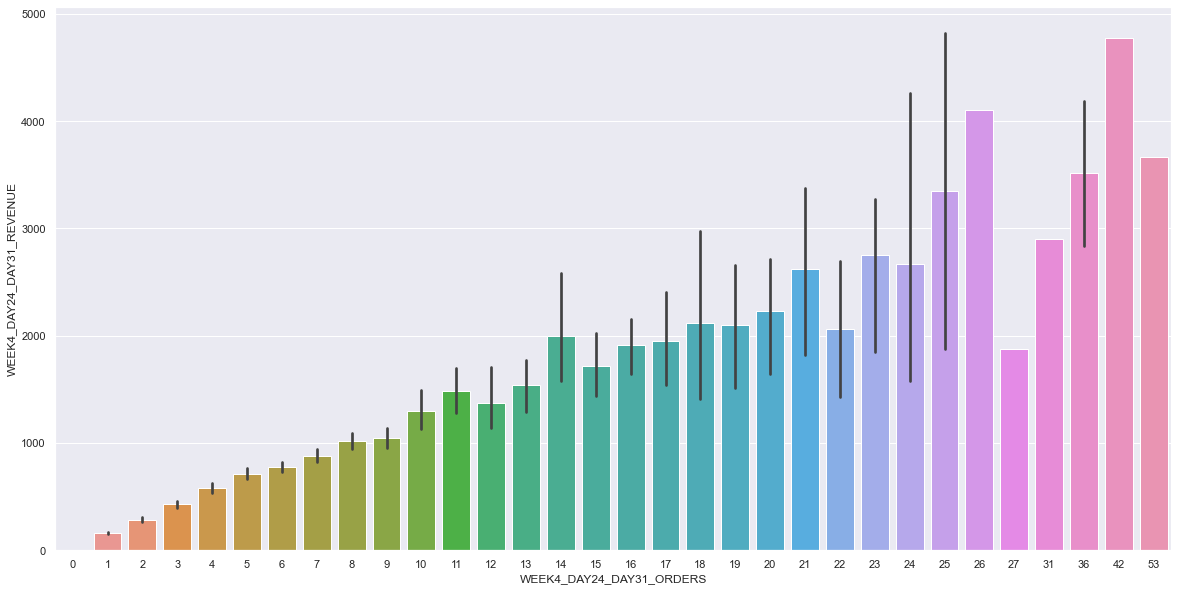

In [12]:
sns.barplot(data=data ,x="WEEK4_DAY24_DAY31_ORDERS",y="WEEK4_DAY24_DAY31_REVENUE")

In [13]:
import datetime as dt
from datetime import datetime
from datetime import timedelta

In [14]:
min_FIRST_ORDER_DATE = min(df['FIRST_ORDER_DATE'])
min_FIRST_ORDER_DATE

Timestamp('2014-02-01 00:00:00')

In [15]:
max_FIRST_ORDER_DATE = max(df['FIRST_ORDER_DATE'])
max_FIRST_ORDER_DATE

Timestamp('2021-10-24 00:00:00')

In [16]:
df['last_purchase_date'] = df.groupby('CustomerID')['FIRST_ORDER_DATE'].transform(max)

In [17]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date']).dt.date

In [18]:
df.head()

CustomerID  TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124 11986.54                96.67            529.59   
1          29            82 11025.96               134.46             97.92   
2          83            43  7259.69               168.83            171.69   
3          95            44  6992.27               158.92             92.82   
4         124            55  6263.44               113.88            179.04   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27       2016-12-30        2021-10-24                 14.19   
1             1.19       2018-03-31        2021-10-24                 15.89   
2             3.99       2017-11-30        2021-10-24                 33.12   
3             2.11       2019-04-09        2021-10-24                 21.11   
4             3.26       2020-10-23        2021-10-24                  6.65   

   DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  \
0                   1             13              13                29   
1                   1             11              13                10   
2                   1              5               4                 3   
3                   1             10               8                 5   
4                   1              2               3                 8   

   THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  \
0               25             19               15             10   
1               13             14               10             11   
2                5              5                8             13   
3                8              5                3              5   
4                8             12               10             12   

   MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  \
0         1287.50          1054.15            2842.52           2133.79   
1         1253.08          2003.25            1819.75           1114.83   
2          698.95           504.97             197.97           1182.97   
3         1753.95          1400.23             570.48           1154.06   
4          150.98           330.38            1090.23            563.63   

   FRIDAY_REVENUE  SATURDAY_REVENUE  SUNDAY_REVENUE  WEEK1_DAY01_DAY07_ORDERS  \
0         2051.94           1496.33         1120.31                        28   
1         1791.86           1624.34         1418.85                        18   
2          733.96           1223.96         2716.91                         9   
3          798.07            630.00          685.48                        12   
4         1339.44            956.56         1832.22                        10   

   WEEK2_DAY08_DAY15_ORDERS  WEEK3_DAY16_DAY23_ORDERS  \
0                        42                        30   
1                        19                        19   
2                        11                         6   
3                        15                         9   
4                        18                        21   

   WEEK4_DAY24_DAY31_ORDERS  WEEK1_DAY01_DAY07_REVENUE  \
0                        24                    2685.37   
1                        26                    1336.09   
2                        17                    2299.93   
3                         8                    2317.95   
4                         6                     831.14   

   WEEK2_DAY08_DAY15_REVENUE  WEEK3_DAY16_DAY23_REVENUE  \
0                    4299.28                    2592.18   
1                    2776.02                    2807.66   
2                    1383.92                     713.94   
3                    2417.22                     997.02   
4                    1938.18                    2725.66   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [20]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['FIRST_ORDER_DATE'] = pd.to_datetime(df['FIRST_ORDER_DATE'])

In [21]:
df['ref_date'] = df['FIRST_ORDER_DATE'].max() + timedelta(days=7)

In [22]:
df['ref_date'] = df['ref_date'].dt.date

In [23]:
df['ref_date'] = pd.to_datetime(df['ref_date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

2. Create a new column called Date which contains the invoice date without the timestamp

In [25]:
df['date'] = pd.to_datetime(df['FIRST_ORDER_DATE'])

In [26]:
df['date'] = df['date'].dt.date

In [27]:
df.sample(4)

CustomerID  TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  \
2761       95541             2   239.99               120.00   
694        72834             2   311.48               155.74   
4058       18213             6   829.97               138.33   
4867      156956             1   135.99               135.99   

      CARRIAGE_REVENUE  AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  \
2761              5.99             3.00       2014-12-11        2021-08-01   
694              13.98             6.99       2021-10-08        2021-10-24   
4058             14.97             2.50       2020-09-28        2021-04-01   
4867              5.99             5.99       2021-04-01        2021-04-01   

      AVGDAYSBETWEENORDERS  DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  \
2761               1212.50                  85              0               0   
694                   8.00                   1              0               0   
4058                 30.83                 207              1               0   
4867                  0.00                 207              0               0   

      WEDNESDAY_ORDERS  THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  \
2761                 0                1              0                0   
694                  0                0              1                0   
4058                 0                4              1                0   
4867                 0                1              0                0   

      SUNDAY_ORDERS  MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  \
2761              1            0.00             0.00               0.00   
694               1            0.00             0.00               0.00   
4058              0          199.99             0.00               0.00   
4867              0            0.00             0.00               0.00   

      THURSDAY_REVENUE  FRIDAY_REVENUE  SATURDAY_REVENUE  SUNDAY_REVENUE  \
2761            175.00            0.00              0.00           64.99   
694               0.00          155.74              0.00          155.74   
4058            512.99          116.99              0.00            0.00   
4867            135.99            0.00              0.00            0.00   

      WEEK1_DAY01_DAY07_ORDERS  WEEK2_DAY08_DAY15_ORDERS  \
2761                         1                         1   
694                          0                         1   
4058                         3                         0   
4867                         1                         0   

      WEEK3_DAY16_DAY23_ORDERS  WEEK4_DAY24_DAY31_ORDERS  \
2761                         0                         0   
694                          0                         1   
4058                         1                         2   
4867                         0                         0   

      WEEK1_DAY01_DAY07_REVENUE  WEEK2_DAY08_DAY15_REVENUE  \
2761                      64.99                     175.00   
694                        0.00                     155.74   
4058                     352.99                       0.00   
4867                     135.99                       0.00   

      WEEK3_DAY16_DAY23_REVENUE  WEEK4_DAY24_DAY31_REVENUE  \
2761                       0.00                       0.00   
694                        0.00                     155.74   
4058                     160.00                     316.98   
4867                       0.00                       0.00   

      TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  TIME_1200_1800_ORDERS  \
2761                      0                      0                      0   
694                       0                      1                      0   
4058                      0                      4                      0   
4867                      1                      0                      0   

      TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  TIME_0601_1200_REVENUE  \
2761                      2                    0.00               

3. Group by CustomerID and check the last date of purchase

In [28]:
customer_recency = pd.DataFrame(df.groupby('CustomerID', as_index=False).date.max())
customer_recency.head()

CustomerID        date
0           1  2020-03-03
1           2  2019-02-13
2           3  2018-02-15
3           4  2016-10-01
4           5  2015-12-27

In [29]:
df[df["CustomerID"] == 5][["CustomerID", 'last_purchase_date']]

CustomerID last_purchase_date
3377           5         2015-12-27

In [30]:
customer_recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5000 non-null   int64 
 1   date        5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 117.2+ KB


4. Calculate the days since last purchase

In [31]:
df["customer_recency"] = df["ref_date"] - df["last_purchase_date"]
df[["CustomerID", 'last_purchase_date', "ref_date", "customer_recency"]]

CustomerID last_purchase_date   ref_date customer_recency
0             22         2016-12-30 2021-10-31        1766 days
1             29         2018-03-31 2021-10-31        1310 days
2             83         2017-11-30 2021-10-31        1431 days
3             95         2019-04-09 2021-10-31         936 days
4            124         2020-10-23 2021-10-31         373 days
...          ...                ...        ...              ...
4995      173946         2021-04-01 2021-10-31         213 days
4996      173987         2021-04-01 2021-10-31         213 days
4997      174004         2021-04-01 2021-10-31         213 days
4998      174038         2021-04-01 2021-10-31         213 days
4999      200783         2014-06-26 2021-10-31        2684 days

[5000 rows x 4 columns]

In [32]:
df['recency2'] = pd.to_numeric(df['customer_recency'].dt.days.astype('int64'))
df[["CustomerID", 'last_purchase_date', "ref_date", "customer_recency", 'recency2']]

CustomerID last_purchase_date   ref_date customer_recency  recency2
0             22         2016-12-30 2021-10-31        1766 days      1766
1             29         2018-03-31 2021-10-31        1310 days      1310
2             83         2017-11-30 2021-10-31        1431 days      1431
3             95         2019-04-09 2021-10-31         936 days       936
4            124         2020-10-23 2021-10-31         373 days       373
...          ...                ...        ...              ...       ...
4995      173946         2021-04-01 2021-10-31         213 days       213
4996      173987         2021-04-01 2021-10-31         213 days       213
4997      174004         2021-04-01 2021-10-31         213 days       213
4998      174038         2021-04-01 2021-10-31         213 days       213
4999      200783         2014-06-26 2021-10-31        2684 days      2684

[5000 rows x 5 columns]

In [33]:
customer_recency = df.groupby('CustomerID', as_index=False)['recency2'].mean()
customer_recency.rename(columns={'recency2':'Recency'}, inplace=True)
customer_recency.sort_values(by='Recency', ascending=False).head()

CustomerID  Recency
4375      110135     2829
1964        5184     2829
2869       27134     2828
2179        7307     2828
2508       13952     2828

5. Drop Last_Purchase_Date since we don't need it anymore

In [34]:
df.drop(['last_purchase_date'], axis = 1, inplace=True)
df.head(3)

CustomerID  TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124 11986.54                96.67            529.59   
1          29            82 11025.96               134.46             97.92   
2          83            43  7259.69               168.83            171.69   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27       2016-12-30        2021-10-24                 14.19   
1             1.19       2018-03-31        2021-10-24                 15.89   
2             3.99       2017-11-30        2021-10-24                 33.12   

   DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  \
0                   1             13              13                29   
1                   1             11              13                10   
2                   1              5               4                 3   

   THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  \
0               25             19               15             10   
1               13             14               10             11   
2                5              5                8             13   

   MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  \
0         1287.50          1054.15            2842.52           2133.79   
1         1253.08          2003.25            1819.75           1114.83   
2          698.95           504.97             197.97           1182.97   

   FRIDAY_REVENUE  SATURDAY_REVENUE  SUNDAY_REVENUE  WEEK1_DAY01_DAY07_ORDERS  \
0         2051.94           1496.33         1120.31                        28   
1         1791.86           1624.34         1418.85                        18   
2          733.96           1223.96         2716.91                         9   

   WEEK2_DAY08_DAY15_ORDERS  WEEK3_DAY16_DAY23_ORDERS  \
0                        42                        30   
1                        19                        19   
2                        11                         6   

   WEEK4_DAY24_DAY31_ORDERS  WEEK1_DAY01_DAY07_REVENUE  \
0                        24                    2685.37   
1                        26                    1336.09   
2                        17                    2299.93   

   WEEK2_DAY08_DAY15_REVENUE  WEEK3_DAY16_DAY23_REVENUE  \
0                    4299.28                    2592.18   
1                    2776.02                    2807.66   
2                    1383.92                     713.94   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1                     13   
2                    2861.90                      0                      6   

   TIME_1200_1800_ORDERS  TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  \
0                     37                     14                 1067.92   
1                     24                     44                   30.25   
2                     12                     25                    0.00   

   TIME_0601_1200_REVENUE  TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  \
0                 5674.65                 3916.53                 1327.44   
1                 3143.69                 2205.47                 5646.55   
2                  707.98                 2560.91                 3990.80   

    ref_date        date customer_recency  recency2  
0 2021-10-31  2016-12-30        1766 days      1766  
1 2021-10-31  2018-03-31        1310 days      1310  
2 2021-10-31  2017-11-30        1431 days      1431

6. Plot RFM distributions

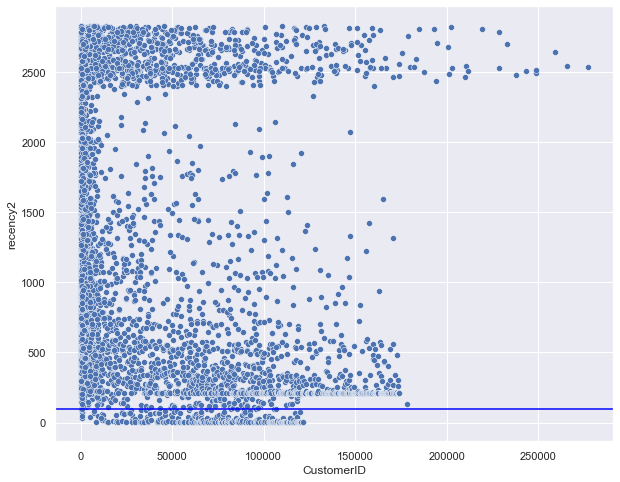

In [35]:
%matplotlib inline

plt.figure(figsize=(10, 8))
graph = sns.scatterplot(data=df, x="CustomerID", y="recency2")
graph.axhline(100, color="blue")
plt.show();

In [36]:
fig = px.scatter(df, x="CustomerID", y="recency2")
fig.show()

In [37]:
fig = px.histogram(df, x="recency2", nbins=70)
fig.show()

# Calculating Frequency

1. Make a copy of dfuk and drop duplicates

In [38]:
dfUK_copy = df.copy()
dfUK_copy.head(3)

CustomerID  TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124 11986.54                96.67            529.59   
1          29            82 11025.96               134.46             97.92   
2          83            43  7259.69               168.83            171.69   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27       2016-12-30        2021-10-24                 14.19   
1             1.19       2018-03-31        2021-10-24                 15.89   
2             3.99       2017-11-30        2021-10-24                 33.12   

   DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  \
0                   1             13              13                29   
1                   1             11              13                10   
2                   1              5               4                 3   

   THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  \
0               25             19               15             10   
1               13             14               10             11   
2                5              5                8             13   

   MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  \
0         1287.50          1054.15            2842.52           2133.79   
1         1253.08          2003.25            1819.75           1114.83   
2          698.95           504.97             197.97           1182.97   

   FRIDAY_REVENUE  SATURDAY_REVENUE  SUNDAY_REVENUE  WEEK1_DAY01_DAY07_ORDERS  \
0         2051.94           1496.33         1120.31                        28   
1         1791.86           1624.34         1418.85                        18   
2          733.96           1223.96         2716.91                         9   

   WEEK2_DAY08_DAY15_ORDERS  WEEK3_DAY16_DAY23_ORDERS  \
0                        42                        30   
1                        19                        19   
2                        11                         6   

   WEEK4_DAY24_DAY31_ORDERS  WEEK1_DAY01_DAY07_REVENUE  \
0                        24                    2685.37   
1                        26                    1336.09   
2                        17                    2299.93   

   WEEK2_DAY08_DAY15_REVENUE  WEEK3_DAY16_DAY23_REVENUE  \
0                    4299.28                    2592.18   
1                    2776.02                    2807.66   
2                    1383.92                     713.94   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1                     13   
2                    2861.90                      0                      6   

   TIME_1200_1800_ORDERS  TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  \
0                     37                     14                 1067.92   
1                     24                     44                   30.25   
2                     12                     25                    0.00   

   TIME_0601_1200_REVENUE  TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  \
0                 5674.65                 3916.53                 1327.44   
1                 3143.69                 2205.47                 5646.55   
2                  707.98                 2560.91                 3990.80   

    ref_date        date customer_recency  recency2  
0 2021-10-31  2016-12-30        1766 days      1766  
1 2021-10-31  2018-03-31        1310 days      1310  
2 2021-10-31  2017-11-30        1431 days      1431

In [39]:
print("There are", dfUK_copy.duplicated(subset=None, keep='first').sum(), "duplicated observations in the dataset.")
print(dfUK_copy.duplicated(subset=None, keep='first').sum(), "Duplicated observations are dropped!")
dfUK_copy.drop_duplicates(keep='first', inplace=True)

There are 0 duplicated observations in the dataset.
0 Duplicated observations are dropped!


2. Calculate the frequency of purchases

In [40]:
customer_frequency = dfUK_copy.groupby('CustomerID', as_index=False)['TOTAL_ORDERS'].nunique()
customer_frequency.rename(columns={'TOTAL_ORDERS':'Frequency'}, inplace=True)
customer_frequency.sort_values(by='Frequency', ascending=False)

CustomerID  Frequency
0              1          1
3330       48888          1
3337       49122          1
3336       49109          1
3335       49092          1
...          ...        ...
1666        3261          1
1665        3257          1
1664        3255          1
1663        3254          1
4999      277160          1

[5000 rows x 2 columns]

In [41]:
customer_frequency.nlargest(5, "Frequency")

CustomerID  Frequency
0           1          1
1           2          1
2           3          1
3           4          1
4           5          1

3. Plot RFM distributions

In [42]:
fig = px.scatter(customer_frequency, x="CustomerID", y="Frequency")
fig.show()

In [43]:
fig = px.histogram(customer_frequency, x="CustomerID", y="Frequency", nbins=3920)
fig.show()

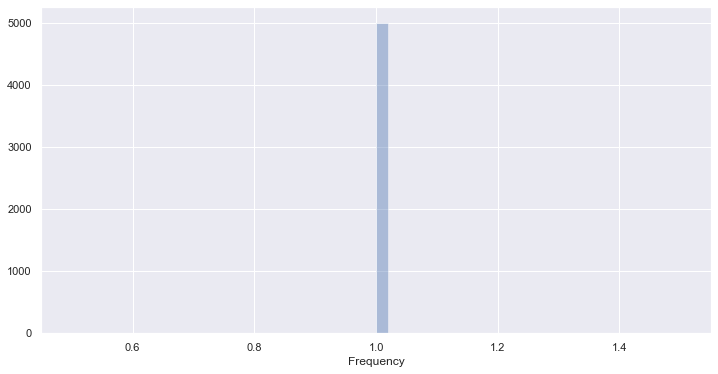

In [44]:
plt.figure(figsize=(12, 6))
sns.distplot(customer_frequency['Frequency'], kde=False, bins=50);

# Calculating Monetary Values

1. Calculate sum total cost by customers and named "Monetary"

In [45]:
customer_monetary = dfUK_copy.groupby('CustomerID', as_index=False)['REVENUE'].sum()
customer_monetary.rename(columns={'REVENUE':'Monetary'}, inplace=True)
customer_monetary.sort_values(by='Monetary', ascending=False).head()

CustomerID  Monetary
0           1  34847.40
1           2  32486.98
2           3  24178.97
3           4  18554.49
4           5  16884.99

In [46]:
customer_monetary.nlargest(5, "Monetary")

CustomerID  Monetary
0           1  34847.40
1           2  32486.98
2           3  24178.97
3           4  18554.49
4           5  16884.99

2. Plot RFM distributions

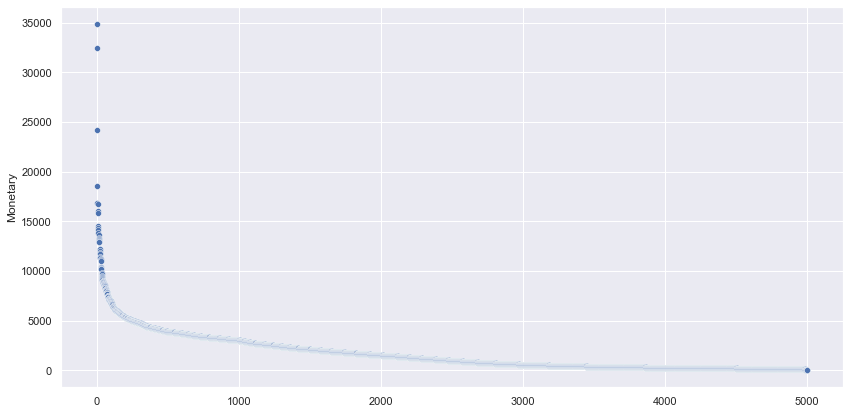

In [47]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=customer_monetary.Monetary);

In [48]:
fig = px.scatter(customer_monetary, x="CustomerID", y="Monetary")
fig.show()

In [49]:
fig = px.histogram(customer_monetary, x="Monetary", nbins=50)
fig.show()

# Creating RFM Table

For creating the RFM Table, we need to merge the recency, frequency and monetary dataframes.

In [50]:
dfUK_copy.head(3)

CustomerID  TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124 11986.54                96.67            529.59   
1          29            82 11025.96               134.46             97.92   
2          83            43  7259.69               168.83            171.69   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27       2016-12-30        2021-10-24                 14.19   
1             1.19       2018-03-31        2021-10-24                 15.89   
2             3.99       2017-11-30        2021-10-24                 33.12   

   DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  \
0                   1             13              13                29   
1                   1             11              13                10   
2                   1              5               4                 3   

   THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  \
0               25             19               15             10   
1               13             14               10             11   
2                5              5                8             13   

   MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  \
0         1287.50          1054.15            2842.52           2133.79   
1         1253.08          2003.25            1819.75           1114.83   
2          698.95           504.97             197.97           1182.97   

   FRIDAY_REVENUE  SATURDAY_REVENUE  SUNDAY_REVENUE  WEEK1_DAY01_DAY07_ORDERS  \
0         2051.94           1496.33         1120.31                        28   
1         1791.86           1624.34         1418.85                        18   
2          733.96           1223.96         2716.91                         9   

   WEEK2_DAY08_DAY15_ORDERS  WEEK3_DAY16_DAY23_ORDERS  \
0                        42                        30   
1                        19                        19   
2                        11                         6   

   WEEK4_DAY24_DAY31_ORDERS  WEEK1_DAY01_DAY07_REVENUE  \
0                        24                    2685.37   
1                        26                    1336.09   
2                        17                    2299.93   

   WEEK2_DAY08_DAY15_REVENUE  WEEK3_DAY16_DAY23_REVENUE  \
0                    4299.28                    2592.18   
1                    2776.02                    2807.66   
2                    1383.92                     713.94   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1                     13   
2                    2861.90                      0                      6   

   TIME_1200_1800_ORDERS  TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  \
0                     37                     14                 1067.92   
1                     24                     44                   30.25   
2                     12                     25                    0.00   

   TIME_0601_1200_REVENUE  TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  \
0                 5674.65                 3916.53                 1327.44   
1                 3143.69                 2205.47                 5646.55   
2                  707.98                 2560.91                 3990.80   

    ref_date        date customer_recency  recency2  
0 2021-10-31  2016-12-30        1766 days      1766  
1 2021-10-31  2018-03-31        1310 days      1310  
2 2021-10-31  2017-11-30        1431 days      1431

In [51]:
customer_rfm = pd.merge(pd.merge(customer_recency, customer_frequency, on='CustomerID'), customer_monetary, on='CustomerID')
customer_rfm.head()

CustomerID  Recency  Frequency  Monetary
0           1      607          1  34847.40
1           2      991          1  32486.98
2           3     1354          1  24178.97
3           4     1856          1  18554.49
4           5     2135          1  16884.99

In [52]:
customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5000 non-null   int64  
 1   Recency     5000 non-null   int64  
 2   Frequency   5000 non-null   int64  
 3   Monetary    5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 195.3 KB


# CUSTOMER SEGMENTATION WITH RFM SCORES

# Calculating RFM Scoring

1. Dividing the customer_rfm into quarters

In [53]:
customer_rfm.describe()

CustomerID  Recency  Frequency  Monetary
count     5000.00  5000.00    5000.00   5000.00
mean     40709.23  1166.68       1.00   1681.52
std      49949.85   936.80       0.00   1998.62
min          1.00     7.00       1.00     38.50
25%       1687.50   347.00       1.00    315.10
50%      13765.00   854.50       1.00    966.73
75%      71891.50  2023.00       1.00   2493.07
max     277160.00  2829.00       1.00  34847.40

In [54]:
quantiles = customer_rfm.quantile(q = [0.25, 0.50, 0.75])
quantiles

CustomerID  Recency  Frequency  Monetary
0.25     1687.50   347.00       1.00    315.10
0.50    13765.00   854.50       1.00    966.73
0.75    71891.50  2023.00       1.00   2493.07

# Creating the RFM Segmentation Table

In [55]:
def recency_scoring(rfm):
    if rfm.Recency <= 24.0:
        recency_score = 4
    elif rfm.Recency <= 57.0:
        recency_score = 3
    elif rfm.Recency <= 149.0:
        recency_score = 2
    else:
        recency_score = 1
    return recency_score

customer_rfm['Recency_Score'] = customer_rfm.apply(recency_scoring, axis=1)
customer_rfm.sample(10)

CustomerID  Recency  Frequency  Monetary  Recency_Score
4821      156106     1223          1    137.08              1
177          178     1665          1   5560.69              1
3871       79260     2682          1    288.49              1
3313       48153      260          1    439.97              1
3604       63974      413          1    349.07              1
3519       59730      500          1    369.97              1
3615       64342     1801          1    347.48              1
4897      165442     1598          1    125.98              1
4461      116954     2715          1    194.44              1
781          782      514          1   3326.49              1

In [56]:
fig = px.pie(df, values = customer_rfm['Recency_Score'].value_counts(), 
             names = (customer_rfm["Recency_Score"].value_counts()).index, 
             title = 'Recency Score Distribution')
fig.show()

In [57]:
def frequency_scoring(rfm):
    if rfm.Frequency >= 10.0:
        frequency_score = 4
    elif rfm.Frequency >= 5.0:
        frequency_score = 3
    elif rfm.Frequency >= 2.0:
        frequency_score = 2
    else:
        frequency_score = 1
    return frequency_score

customer_rfm['Frequency_Score'] = customer_rfm.apply(frequency_scoring, axis=1)
customer_rfm.sample(10)

CustomerID  Recency  Frequency  Monetary  Recency_Score  Frequency_Score
3483       58392      393          1    376.62              1                1
4668      137618      213          1    161.59              1                1
2844       26240      344          1    665.62              1                1
163          164     2797          1   5746.05              1                1
1499        2537     2754          1   2106.86              1                1
3477       58151     1771          1    377.98              1                1
3072       36278     2646          1    539.02              1                1
4665      136993     2629          1    162.49              1                1
1137        1372      731          1   2673.29              1                1
2673       19283     1000          1    801.99              1                1

In [58]:
fig = px.pie(df, values = customer_rfm['Frequency_Score'].value_counts(), 
             names = (customer_rfm["Frequency_Score"].value_counts()).index, 
             title = 'Frequency Score Distribution')
fig.show()

In [59]:
def monetary_scoring(rfm):
    if rfm.Monetary >= 1571.0:
        monetary_score = 4
    elif rfm.Monetary >= 645.0:
        monetary_score = 3
    elif rfm.Monetary >= 298.0:
        monetary_score = 2
    else:
        monetary_score = 1
    return monetary_score

customer_rfm['Monetary_Score'] = customer_rfm.apply(monetary_scoring, axis=1)
customer_rfm.sample(10)

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
4530      121436      213          1    185.09              1   
1970        5212     1426          1   1544.75              1   
4736      146405      226          1    149.48              1   
4508      119641        7          1    189.00              4   
1185        1485      295          1   2602.49              1   
2284        8979      127          1   1204.87              2   
1276        1760      928          1   2444.02              1   
3541       60832     1851          1    364.00              1   
14            15      901          1  13180.85              1   
2381       10676     2686          1   1102.79              1   

      Frequency_Score  Monetary_Score  
4530                1               1  
1970                1               3  
4736                1               1  
4508                1               1  
1185                1               4  
2284                1               3  
1276                1               4  
3541                1               2  
14                  1               4  
2381                1               3

In [60]:
fig = px.pie(df, values = customer_rfm['Monetary_Score'].value_counts(), 
             names = (customer_rfm["Monetary_Score"].value_counts()).index, 
             title = 'Monetary Score Distribution')
fig.show()

In [61]:
customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Recency          5000 non-null   int64  
 2   Frequency        5000 non-null   int64  
 3   Monetary         5000 non-null   float64
 4   Recency_Score    5000 non-null   int64  
 5   Frequency_Score  5000 non-null   int64  
 6   Monetary_Score   5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 312.5 KB


3. Now that scored each customer, you'll combine the scores for segmentation.

In [62]:
def rfm_scoring(customer):
    return str(int(customer['Recency_Score'])) + str(int(customer['Frequency_Score'])) + str(int(customer['Monetary_Score']))


customer_rfm['Customer_RFM_Score'] = customer_rfm.apply(rfm_scoring, axis=1)
customer_rfm.sample(8)

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
3115       37989      481          1    522.23              1   
1441        2354      914          1   2169.85              1   
1076        1202     1984          1   2809.53              1   
3473       57883      571          1    379.39              1   
58            59     2731          1   8319.00              1   
3272       45899     2789          1    455.92              1   
3677       67748      538          1    332.29              1   
3291       46911     2522          1    448.18              1   

      Frequency_Score  Monetary_Score Customer_RFM_Score  
3115                1               2                112  
1441                1               4                114  
1076                1               4                114  
3473                1               2                112  
58                  1               4                114  
3272                1               2                112  
3677                1               2                112  
3291                1               2                112

In [63]:
fig = px.histogram(customer_rfm, x = customer_rfm['Customer_RFM_Score'].value_counts().index, 
                   y = customer_rfm['Customer_RFM_Score'].value_counts().values, 
                   title = 'Customer RFM Score Distribution',
                   labels = dict(x = "Customer_RFM_Score", y ="counts"))
fig.show()

4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Label.

In [64]:
customer_rfm['RFM_Label'] = customer_rfm['Recency_Score'] + customer_rfm['Frequency_Score'] + customer_rfm['Monetary_Score']

customer_rfm.sample(8)

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
129          130      569          1   6137.82              1   
4837      159016      213          1    133.99              1   
3352       50017      525          1    426.50              1   
3625       65036        7          1    344.25              4   
3501       59132      543          1    372.98              1   
663          664     1472          1   3569.46              1   
1620        3021     2588          1   1953.45              1   
61            62      296          1   8215.90              1   

      Frequency_Score  Monetary_Score Customer_RFM_Score  RFM_Label  
129                 1               4                114          6  
4837                1               1                111          3  
3352                1               2                112          4  
3625                1               2                412          7  
3501                1               2                112          4  
663                 1               4                114          6  
1620                1               4                114          6  
61                  1               4                114          6

In [65]:
customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          5000 non-null   int64  
 1   Recency             5000 non-null   int64  
 2   Frequency           5000 non-null   int64  
 3   Monetary            5000 non-null   float64
 4   Recency_Score       5000 non-null   int64  
 5   Frequency_Score     5000 non-null   int64  
 6   Monetary_Score      5000 non-null   int64  
 7   Customer_RFM_Score  5000 non-null   object 
 8   RFM_Label           5000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 390.6+ KB


In [66]:
customer_rfm.groupby(['Customer_RFM_Score']).size().sort_values(ascending=False)[:]

Customer_RFM_Score
114    1929
111     996
113     898
112     816
411     130
412      69
212      38
211      34
213      19
312      19
311      16
214      14
413      14
313       4
314       4
dtype: int64

In [67]:
customer_rfm[customer_rfm['Customer_RFM_Score']=='111'].head(3)

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
3825       76528      256          1    297.98              1   
3826       76585     2657          1    297.73              1   
3830       76675      213          1    297.49              1   

      Frequency_Score  Monetary_Score Customer_RFM_Score  RFM_Label  
3825                1               1                111          3  
3826                1               1                111          3  
3830                1               1                111          3

In [68]:
customer_rfm[customer_rfm['Customer_RFM_Score']=='222'].head(3)

Empty DataFrame
Columns: [CustomerID, Recency, Frequency, Monetary, Recency_Score, Frequency_Score, Monetary_Score, Customer_RFM_Score, RFM_Label]
Index: []

In [69]:
fig = px.pie(df, values = customer_rfm['RFM_Label'].value_counts(), 
             names = (customer_rfm["RFM_Label"].value_counts()).index, 
             title = 'RFM Label Distribution')
fig.show()

In [70]:
customer_rfm['RFM_Label'].min()

3

In [71]:
customer_rfm['RFM_Label'].max()

8

In [72]:
np.sort(customer_rfm['RFM_Label'].unique())

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [73]:
segments = {'Customer_Segment':[ 
                                'Champions', 
                                'Potential customer', 
                                'Top Recent Customer', 
                                'Recent Customer', 
                                'Top Customer Needed Attention', 
                                'Customer Needed Attention', 
                                'Top Lost Customer', 
                                'Lost Customer'],
            'RFM':[ 
                   '(3)-(1|2|3|4)-(3|4)', 
                   '(3)-(1|2|3|4)-(1|2)', 
                   '(4)-(1|2|3|4)-(3|4)', 
                   '(4)-(1|2|3|4)-(1|2)',
                   '(2|3)-(1|2|3|4)-(3|4)', 
                   '(2|3)-(1|2|3|4)-(1|2)',
                   '(1)-(1|2|3|4)-(3|4)', 
                   '(1)-(1|2|3|4)-(1|2)',]}

pd.DataFrame(segments)

Customer_Segment                    RFM
0                      Champions    (3)-(1|2|3|4)-(3|4)
1             Potential customer    (3)-(1|2|3|4)-(1|2)
2            Top Recent Customer    (4)-(1|2|3|4)-(3|4)
3                Recent Customer    (4)-(1|2|3|4)-(1|2)
4  Top Customer Needed Attention  (2|3)-(1|2|3|4)-(3|4)
5      Customer Needed Attention  (2|3)-(1|2|3|4)-(1|2)
6              Top Lost Customer    (1)-(1|2|3|4)-(3|4)
7                  Lost Customer    (1)-(1|2|3|4)-(1|2)

In [74]:
def categorizer(rfm):
    
    if (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Champions'
 
        
    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Potential customers'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Recent Customer'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Recent Customer'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Customer Needed Attention'    
   
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Customer Needed Attention'
    
    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Lost Customer'
                
    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost Customer'
    
    return rfm 
 

In [75]:
customer_rfm['Customer_Category'] = customer_rfm["Customer_RFM_Score"].apply(categorizer)
customer_rfm

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
0              1      607          1  34847.40              1   
1              2      991          1  32486.98              1   
2              3     1354          1  24178.97              1   
3              4     1856          1  18554.49              1   
4              5     2135          1  16884.99              1   
...          ...      ...        ...       ...            ...   
4995      248709     2493          1     59.95              1   
4996      248710     2514          1     59.94              1   
4997      259042     2647          1     51.94              1   
4998      266024     2543          1     45.94              1   
4999      277160     2536          1     38.50              1   

      Frequency_Score  Monetary_Score Customer_RFM_Score  RFM_Label  \
0                   1               4                114          6   
1                   1               4                114          6   
2                   1               4                114          6   
3                   1               4                114          6   
4                   1               4                114          6   
...               ...             ...                ...        ...   
4995                1               1                111          3   
4996                1               1                111          3   
4997                1               1                111          3   
4998                1               1                111          3   
4999                1               1                111          3   

      Customer_Category  
0     Top Lost Customer  
1     Top Lost Customer  
2     Top Lost Customer  
3     Top Lost Customer  
4     Top Lost Customer  
...                 ...  
4995      Lost Customer  
4996      Lost Customer  
4997      Lost Customer  
4998      Lost Customer  
4999      Lost Customer  

[5000 rows x 10 columns]

In [76]:
customer_rfm.groupby('Customer_Category').RFM_Label.mean()

Customer_Category
Champions                       7.50
Customer Needed Attention       4.53
Lost Customer                   3.45
Potential customers             5.54
Recent Customer                 6.35
Top Customer Needed Attention   6.42
Top Lost Customer               5.68
Top Recent Customer             8.00
Name: RFM_Label, dtype: float64

In [77]:
customer_rfm['Customer_Category'].value_counts(dropna=False, normalize=True)*100

Top Lost Customer               56.54
Lost Customer                   36.24
Recent Customer                  3.98
Customer Needed Attention        1.44
Potential customers              0.70
Top Customer Needed Attention    0.66
Top Recent Customer              0.28
Champions                        0.16
Name: Customer_Category, dtype: float64

In [78]:
customer_rfm[customer_rfm['Customer_Category'] == "Recent Customer"].sample(8)

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
3537       60620        7          1    365.00              4   
4511      120092        7          1    188.00              4   
4025       87547        7          1    261.99              4   
3828       76641        7          1    297.50              4   
4023       87384       16          1    262.65              4   
3924       81986        7          1    279.65              4   
3683       68281        7          1    329.99              4   
4000       85964       10          1    266.98              4   

      Frequency_Score  Monetary_Score Customer_RFM_Score  RFM_Label  \
3537                1               2                412          7   
4511                1               1                411          6   
4025                1               1                411          6   
3828                1               1                411          6   
4023                1               1                411          6   
3924                1               1                411          6   
3683                1               2                412          7   
4000                1               1                411          6   

     Customer_Category  
3537   Recent Customer  
4511   Recent Customer  
4025   Recent Customer  
3828   Recent Customer  
4023   Recent Customer  
3924   Recent Customer  
3683   Recent Customer  
4000   Recent Customer

In [79]:
fig = px.histogram(customer_rfm, 
                   x = customer_rfm['Customer_Category'].value_counts().index, 
                   y = customer_rfm['Customer_Category'].value_counts().values, 
                   title = 'Customer Category Distribution',
                   labels = dict(x = "Customer_Category", y ="counts"))
fig.show()

In [80]:
fig = px.pie(df, 
             values = customer_rfm['Customer_Category'].value_counts(), 
             names = (customer_rfm["Customer_Category"].value_counts()).index, 
             title = 'Customer Category Distribution')
fig.show()

5. Calculate average values for each RFM_Label, and return a size of each segment.

In [81]:
customer_rfm

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
0              1      607          1  34847.40              1   
1              2      991          1  32486.98              1   
2              3     1354          1  24178.97              1   
3              4     1856          1  18554.49              1   
4              5     2135          1  16884.99              1   
...          ...      ...        ...       ...            ...   
4995      248709     2493          1     59.95              1   
4996      248710     2514          1     59.94              1   
4997      259042     2647          1     51.94              1   
4998      266024     2543          1     45.94              1   
4999      277160     2536          1     38.50              1   

      Frequency_Score  Monetary_Score Customer_RFM_Score  RFM_Label  \
0                   1               4                114          6   
1                   1               4                114          6   
2                   1               4                114          6   
3                   1               4                114          6   
4                   1               4                114          6   
...               ...             ...                ...        ...   
4995                1               1                111          3   
4996                1               1                111          3   
4997                1               1                111          3   
4998                1               1                111          3   
4999                1               1                111          3   

      Customer_Category  
0     Top Lost Customer  
1     Top Lost Customer  
2     Top Lost Customer  
3     Top Lost Customer  
4     Top Lost Customer  
...                 ...  
4995      Lost Customer  
4996      Lost Customer  
4997      Lost Customer  
4998      Lost Customer  
4999      Lost Customer  

[5000 rows x 10 columns]

In [82]:
Avg_RFM_Label = customer_rfm.groupby('Customer_Category').RFM_Label.mean()
Size_RFM_Label = customer_rfm['Customer_Category'].value_counts()
df_customer_segmentation = pd.concat([Avg_RFM_Label, Size_RFM_Label], axis=1).rename(columns={'RFM_Label':'Avg_RFM_Label',
                                                                           'Customer_Category':'Size_RFM_Label'})
df_customer_segmentation

Avg_RFM_Label  Size_RFM_Label
Champions                               7.50               8
Customer Needed Attention               4.53              72
Lost Customer                           3.45            1812
Potential customers                     5.54              35
Recent Customer                         6.35             199
Top Customer Needed Attention           6.42              33
Top Lost Customer                       5.68            2827
Top Recent Customer                     8.00              14

In [83]:
fig = px.histogram(customer_rfm, 
                   x = customer_rfm.groupby('Customer_Category').RFM_Label.mean().sort_values(ascending=False).index, 
                   y = customer_rfm.groupby('Customer_Category').RFM_Label.mean().sort_values(ascending=False).values, 
                   title = 'The Average of RFM Label',
                   labels = dict(x = "Customer Segments (Categories)", y ="RFM Label Mean Values"))
fig.show()

In [84]:
fig = px.treemap(df_customer_segmentation, 
                 path=[df_customer_segmentation.index], 
                 values='Avg_RFM_Label', 
                 width=950, height=600)

fig.update_layout(title_text='The Average of Each Customer Segments',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [85]:
fig = px.histogram(customer_rfm, 
                   x = customer_rfm['Customer_Category'].value_counts().index, 
                   y = customer_rfm['Customer_Category'].value_counts().values, 
                   title = 'The Size of RFM Label',
                   labels = dict(x = "Customer Segments (Categories)", y ="RFM Label Mean Values"))
fig.show()

In [86]:
fig = px.treemap(df_customer_segmentation, 
                 path=[df_customer_segmentation.index], 
                 values='Size_RFM_Label', 
                 width=950, height=600)

fig.update_layout(title_text='Customer Segmentation',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Plotting RFM Segments

1. Create your plot and resize it.

In [87]:
customer_rfm.head(3)

CustomerID  Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
0           1      607          1  34847.40              1                1   
1           2      991          1  32486.98              1                1   
2           3     1354          1  24178.97              1                1   

   Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  
0               4                114          6  Top Lost Customer  
1               4                114          6  Top Lost Customer  
2               4                114          6  Top Lost Customer

In [88]:
segmentation = pd.DataFrame(customer_rfm.Customer_Category.value_counts(dropna=False).sort_values(ascending=False))
segmentation.reset_index(inplace=True)
segmentation.rename(columns={'index':'Customer Category', 'Customer_Category':'The Number Of Customer'}, inplace=True)
segmentation

Customer Category  The Number Of Customer
0              Top Lost Customer                    2827
1                  Lost Customer                    1812
2                Recent Customer                     199
3      Customer Needed Attention                      72
4            Potential customers                      35
5  Top Customer Needed Attention                      33
6            Top Recent Customer                      14
7                      Champions                       8

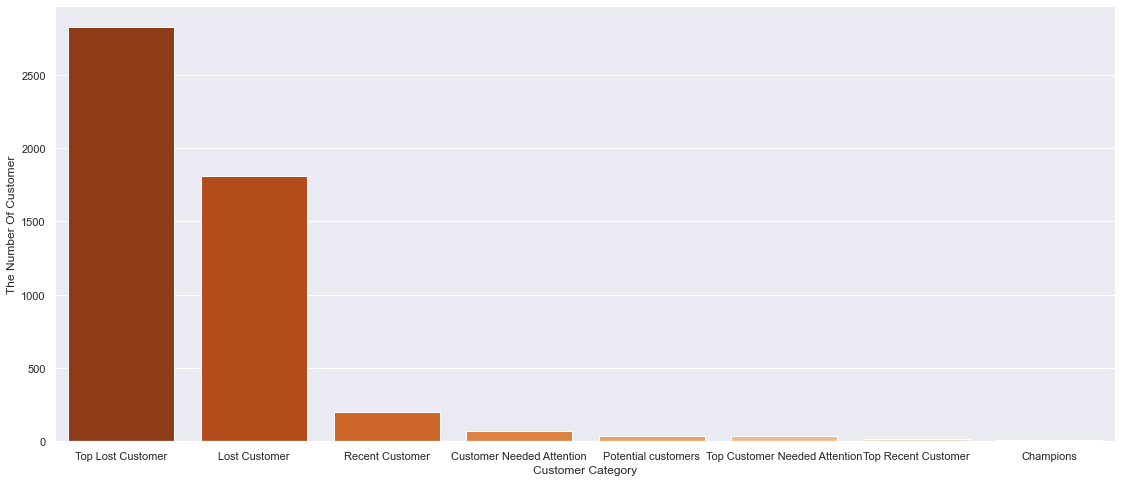

In [89]:
plt.figure(figsize=(19, 8))

sns.barplot(data=segmentation, x='Customer Category', y='The Number Of Customer', palette='Oranges_r');

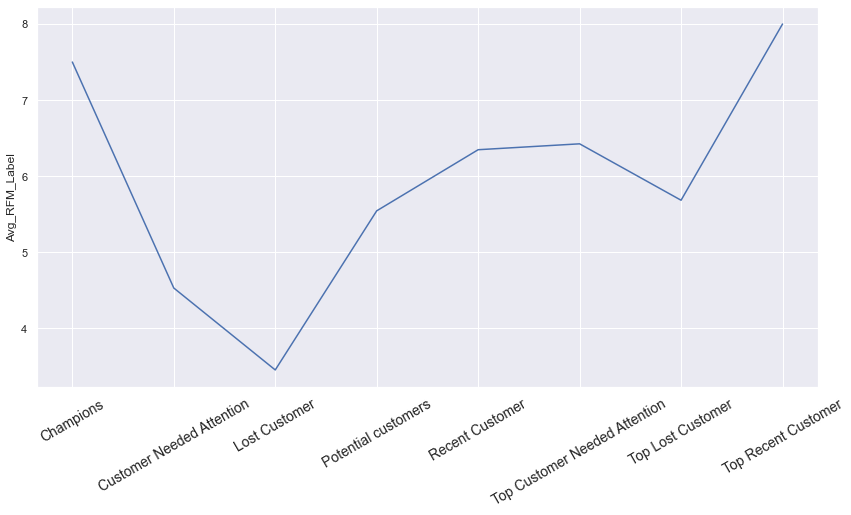

In [90]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_customer_segmentation.index, y=df_customer_segmentation.Avg_RFM_Label)
plt.xticks(rotation=30, fontsize=14);

In [91]:
fig = px.bar(segmentation, x='Customer Category', y='The Number Of Customer')
fig.show()

Using customer segmentation categories found here we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [92]:
segmentation

Customer Category  The Number Of Customer
0              Top Lost Customer                    2827
1                  Lost Customer                    1812
2                Recent Customer                     199
3      Customer Needed Attention                      72
4            Potential customers                      35
5  Top Customer Needed Attention                      33
6            Top Recent Customer                      14
7                      Champions                       8

Segment Visualization with Plotly Matplotlib Squarify

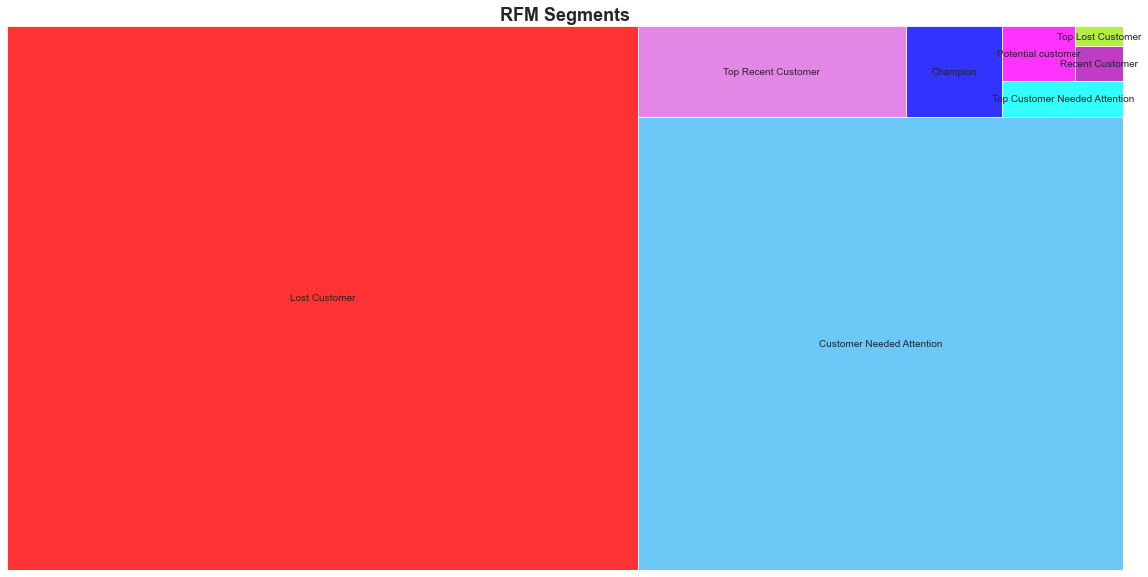

In [93]:

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 10)
sq.plot(sizes=segmentation['The Number Of Customer'], 
                      label=['Lost Customer', 
                            'Customer Needed Attention', 
                            'Top Recent Customer', 
                            'Champion', 
                            'Top Customer Needed Attention', 
                            'Potential customer', 
                            
                            'Recent Customer', 
                            'Top Lost Customer'], 
                            alpha=0.8, 
                            color=["red", "#48BCF5", "#DD6AE1", "blue", "cyan", "magenta", '#B20CB7', "#A4E919"])
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

Segment Visualization with Plotly TreeMap

In [94]:
fig = px.treemap(segmentation,
                 path=[segmentation['Customer Category']], 
                 values='The Number Of Customer', 
                 width=900, 
                 height=600)
fig.update_layout(title="RFM Segments",
                  title_x = 0.5, title_font = dict(size=18),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# APPLYING K-MEANS CLUSTERING

 Data Pre-Processing & Exploring

In [95]:
customer_rfm.sample(5)

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
775          776      703          1   3332.66              1   
474          475     1586          1   3986.97              1   
191          192     1202          1   5430.03              1   
3389       52335     1076          1    411.96              1   
2286        8999     2820          1   1203.19              1   

      Frequency_Score  Monetary_Score Customer_RFM_Score  RFM_Label  \
775                 1               4                114          6   
474                 1               4                114          6   
191                 1               4                114          6   
3389                1               2                112          4   
2286                1               3                113          5   

      Customer_Category  
775   Top Lost Customer  
474   Top Lost Customer  
191   Top Lost Customer  
3389      Lost Customer  
2286  Top Lost Customer

In [96]:
customer_rfm.groupby('RFM_Label')[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].describe().style.background_gradient(cmap='RdPu')

 Defining and Plot Feature Correlations

In [97]:
customer_rfm.corr()

CustomerID  Recency  Frequency  Monetary  Recency_Score  \
CustomerID             1.00    -0.21        NaN     -0.56           0.18   
Recency               -0.21     1.00        NaN      0.12          -0.32   
Frequency               NaN      NaN        NaN       NaN            NaN   
Monetary              -0.56     0.12        NaN      1.00          -0.16   
Recency_Score          0.18    -0.32        NaN     -0.16           1.00   
Frequency_Score         NaN      NaN        NaN       NaN            NaN   
Monetary_Score        -0.90     0.19        NaN      0.68          -0.25   
RFM_Label             -0.80     0.02        NaN      0.58           0.28   

                 Frequency_Score  Monetary_Score  RFM_Label  
CustomerID                   NaN           -0.90      -0.80  
Recency                      NaN            0.19       0.02  
Frequency                    NaN             NaN        NaN  
Monetary                     NaN            0.68       0.58  
Recency_Score                NaN           -0.25       0.28  
Frequency_Score              NaN             NaN        NaN  
Monetary_Score               NaN            1.00       0.86  
RFM_Label                    NaN            0.86       1.00

Let's check if there exits a multicollinearity problem among the features.

In [98]:
df_temp = customer_rfm.corr()

feature =[]
collinear=[]

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .85 and df_temp[col][i] < 1) or (df_temp[col][i]< -.85 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m") 

unique_list = list(set(feature+collinear))

print(colored('*'*80, 'cyan', attrs=['bold']))
print("\033[1mThe total number of strong corelated features:\033[0m", len(unique_list)) 

For CustomerID and CustomerID, there is NO multicollinearity problem
For CustomerID and Recency, there is NO multicollinearity problem
For CustomerID and Frequency, there is NO multicollinearity problem
For CustomerID and Monetary, there is NO multicollinearity problem
For CustomerID and Recency_Score, there is NO multicollinearity problem
For CustomerID and Frequency_Score, there is NO multicollinearity problem
multicolinearity alert between CustomerID - Monetary_Score
For CustomerID and RFM_Label, there is NO multicollinearity problem
For Recency and CustomerID, there is NO multicollinearity problem
For Recency and Recency, there is NO multicollinearity problem
For Recency and Frequency, there is NO multicollinearity problem
For Recency and Monetary, there is NO multicollinearity problem
For Recency and Recency_Score, there is NO multicollinearity problem
For Recency and Frequency_Score, there is NO multicollinearity problem
For Recency and Monetary_Score, there is NO multicollineari

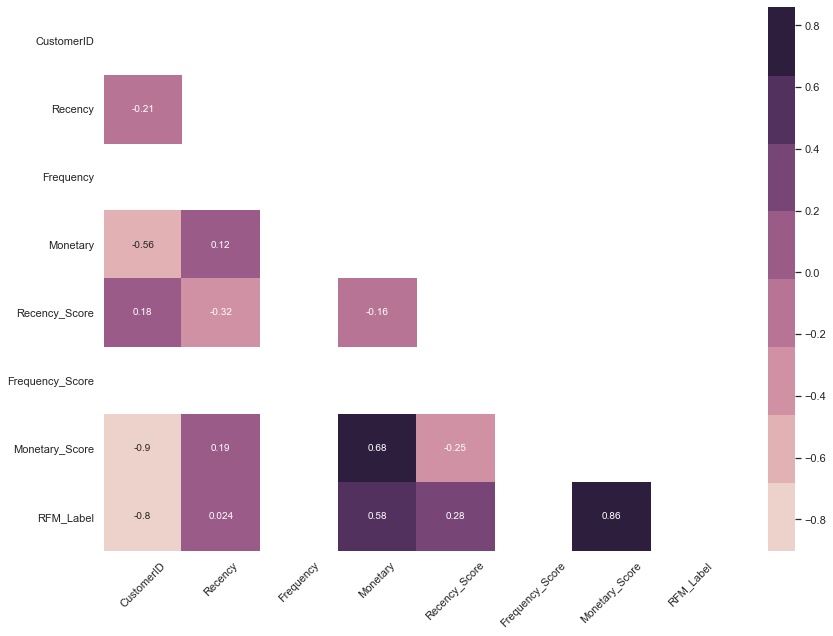

In [99]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(customer_rfm.corr())

# using the upper triangle matrix as mask 
sns.heatmap(customer_rfm.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

In [100]:
customer_rfm.head(3)

CustomerID  Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
0           1      607          1  34847.40              1                1   
1           2      991          1  32486.98              1                1   
2           3     1354          1  24178.97              1                1   

   Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  
0               4                114          6  Top Lost Customer  
1               4                114          6  Top Lost Customer  
2               4                114          6  Top Lost Customer

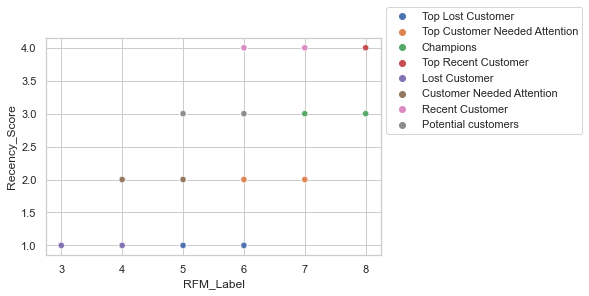

In [101]:
g = sns.scatterplot(data=customer_rfm, x="RFM_Label", y="Recency_Score", hue="Customer_Category")
g.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1);

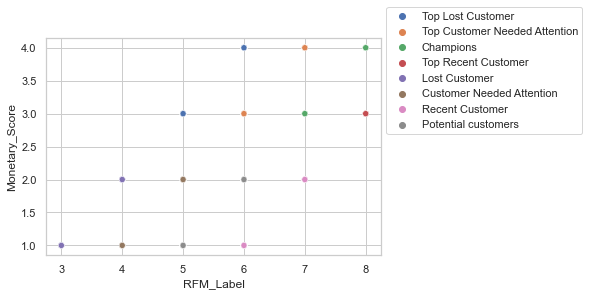

In [102]:
g = sns.scatterplot(data=customer_rfm, x="RFM_Label", y="Monetary_Score", hue="Customer_Category")
g.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1);

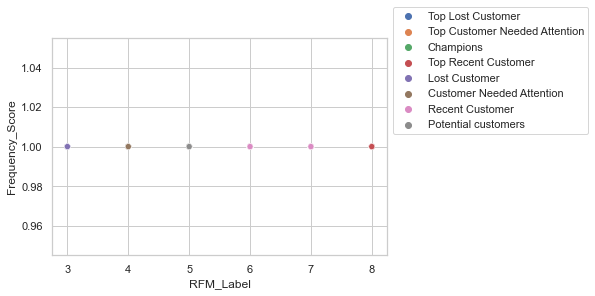

In [103]:
g = sns.scatterplot(data=customer_rfm, x="RFM_Label", y="Frequency_Score", hue="Customer_Category")
g.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1);

It seems that there have been strong correlations between RFM_Label and the features including RFM scores; however, it should be remembered that RFM_Label were derived from these related RFM scores. So the strong relationship among them is inevitable and acceptable and does NOT create any problem for our analysis.

# Visualizing Feature Distributions

<Figure size 1440x1440 with 0 Axes>

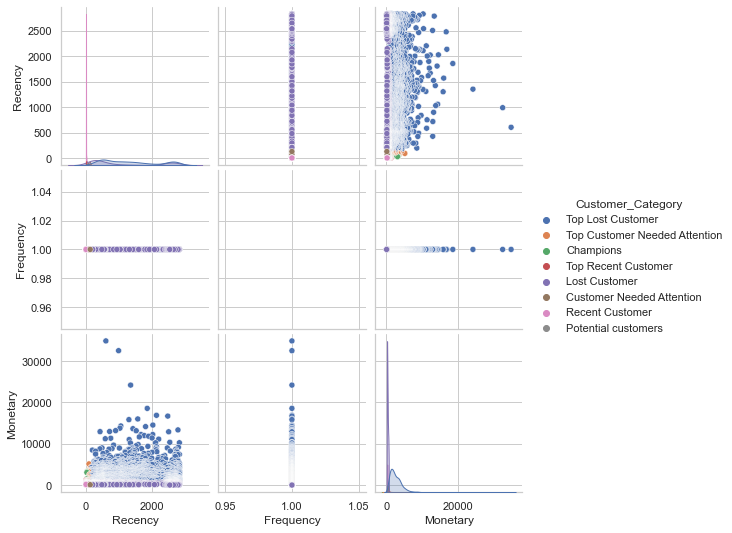

In [104]:
plt.figure(figsize=(20, 20))
sns.pairplot(customer_rfm[['Recency', 'Frequency', 'Monetary','Customer_Category']], hue='Customer_Category');

<Figure size 1440x1440 with 0 Axes>

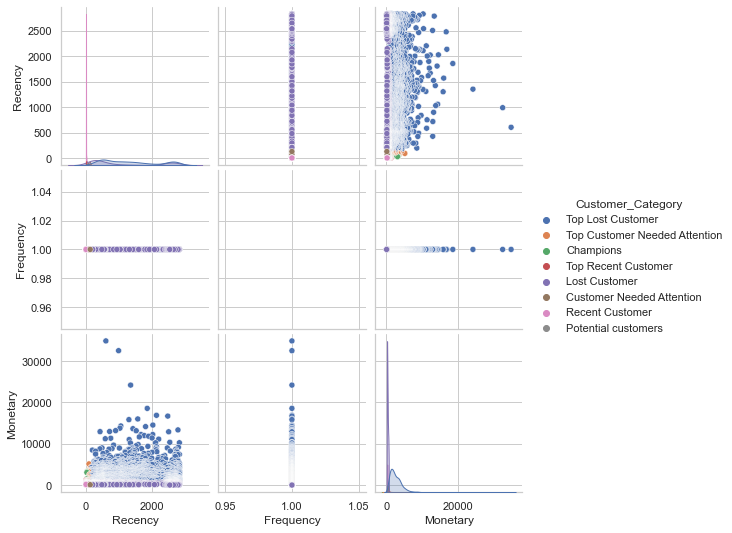

In [105]:
plt.figure(figsize=(20, 20))
sns.pairplot(customer_rfm[['Recency', 'Frequency', 'Monetary','Customer_Category']], hue='Customer_Category');

In [106]:
customer_rfm[['Recency', 'Frequency', 'Monetary']].iplot(kind='histogram', subplots=True, bins=50)

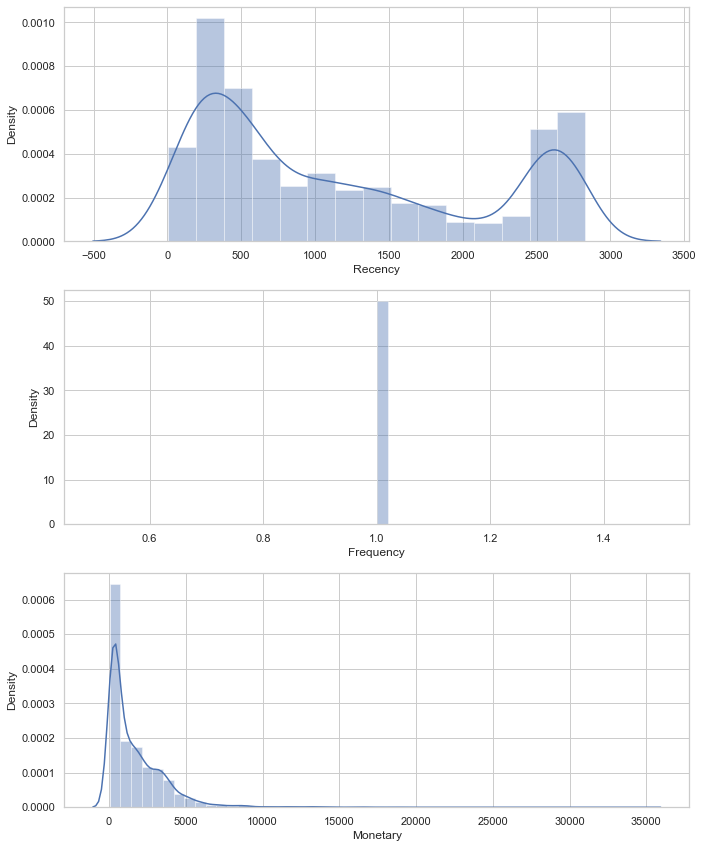

In [107]:
# plot the distribution of RFM values

f, ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(customer_rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(customer_rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(customer_rfm.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

# Data Normalization

In [108]:
customer_rfm[['Recency', 'Frequency', 'Monetary']].sample(10)

Recency  Frequency  Monetary
4625      213          1    170.00
1668     1488          1   1886.19
676       649          1   3536.42
1525     1279          1   2067.86
3104      700          1    525.99
1847     1114          1   1680.83
440      1216          1   4100.07
4082      225          1    250.98
173      1778          1   5599.75
805      2049          1   3287.77

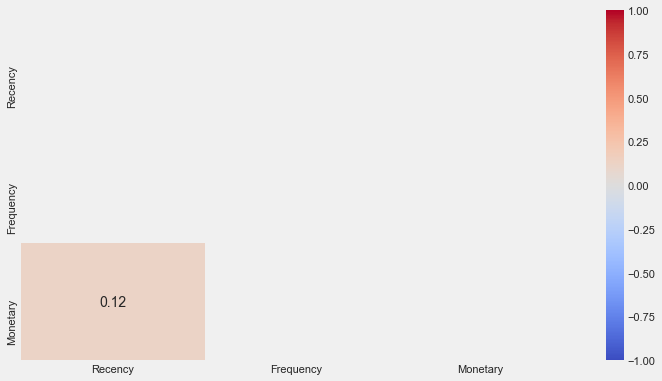

In [109]:
matrix = np.triu(customer_rfm[['Recency','Frequency','Monetary']].corr())
fig, ax = plt.subplots(figsize=(11, 6)) 
sns.heatmap (customer_rfm[['Recency','Frequency','Monetary']].corr(), 
             annot=True, 
             fmt= '.2f', 
             vmin=-1, 
             vmax=1, 
             center=0, 
             cmap='coolwarm',
             mask=matrix, 
             ax=ax);

In [110]:
customer_rfm.set_index("CustomerID", inplace=True)
cell=customer_rfm.copy()

In [111]:
# **Handling with Skewness - np.log**

skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = customer_rfm[['Recency', 'Frequency', 'Monetary']].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Monetary   3.91
dtype: float64

In [112]:
rfm_log = customer_rfm[skew_cols.index].copy()

for col in skew_cols.index.values:
    rfm_log[col] = rfm_log[col].apply(np.log1p)

    print(rfm_log.skew())
print()

rfm_log.iplot(kind='histogram', subplots=True, bins=50);

Monetary   -0.01
dtype: float64



0.75 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.

In [113]:
#  Interpreting Skewness 

for skew in rfm_log.skew():
    if -0.75 < skew < 0.75:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.75 < skew < -1.0 or 0.75 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')


A skewness value of   -0.013612027655707336  means that the distribution is approx.   symmetric 


In [114]:
rfm_log.head(10)

Monetary
CustomerID          
1              10.46
2              10.39
3              10.09
4               9.83
5               9.73
6               9.72
7               9.68
8               9.67
9               9.58
10              9.57

In [115]:
rfm_log.iplot(kind='histogram',subplots=True,bins=50);

In [116]:
# customer_rfm
# rfm_trans = pd.merge(customer_rfm,rfm_log)
# rfm_trans = pd.merge(customer_rfm,rfm_log, on=[])
col=cell.drop(["Recency_Score",'Frequency_Score','Monetary_Score',"Customer_RFM_Score",'RFM_Label','Customer_Category','Monetary'],axis=1)
rfm_trans = pd.concat([col,rfm_log,], axis=1,join='inner')

In [117]:
rfm_trans.head(5)

Recency  Frequency  Monetary
CustomerID                              
1               607          1     10.46
2               991          1     10.39
3              1354          1     10.09
4              1856          1      9.83
5              2135          1      9.73

In [118]:
rfm_trans.iplot(kind='histogram', subplots=True, bins=50);

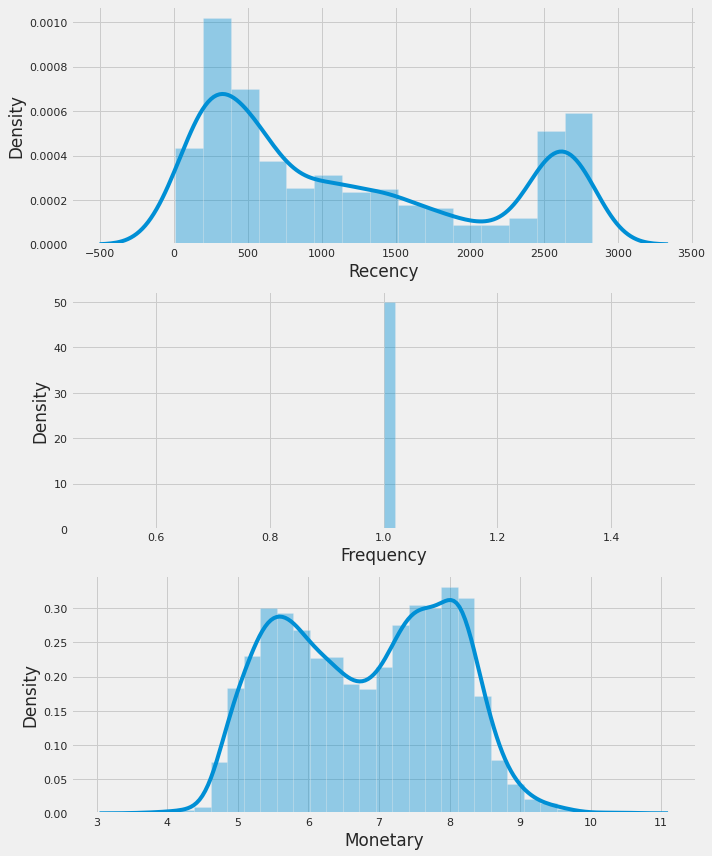

In [119]:
f, ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_trans.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_trans.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_trans.Monetary, label = 'Monetary')
plt.style.use('default')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

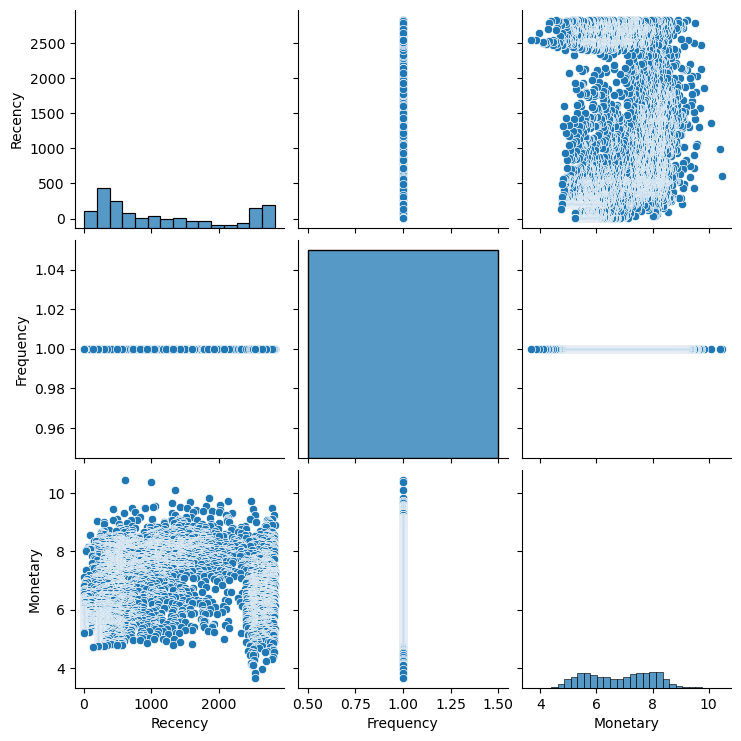

In [120]:
plt.figure(figsize = (20,20));
sns.pairplot(rfm_trans);

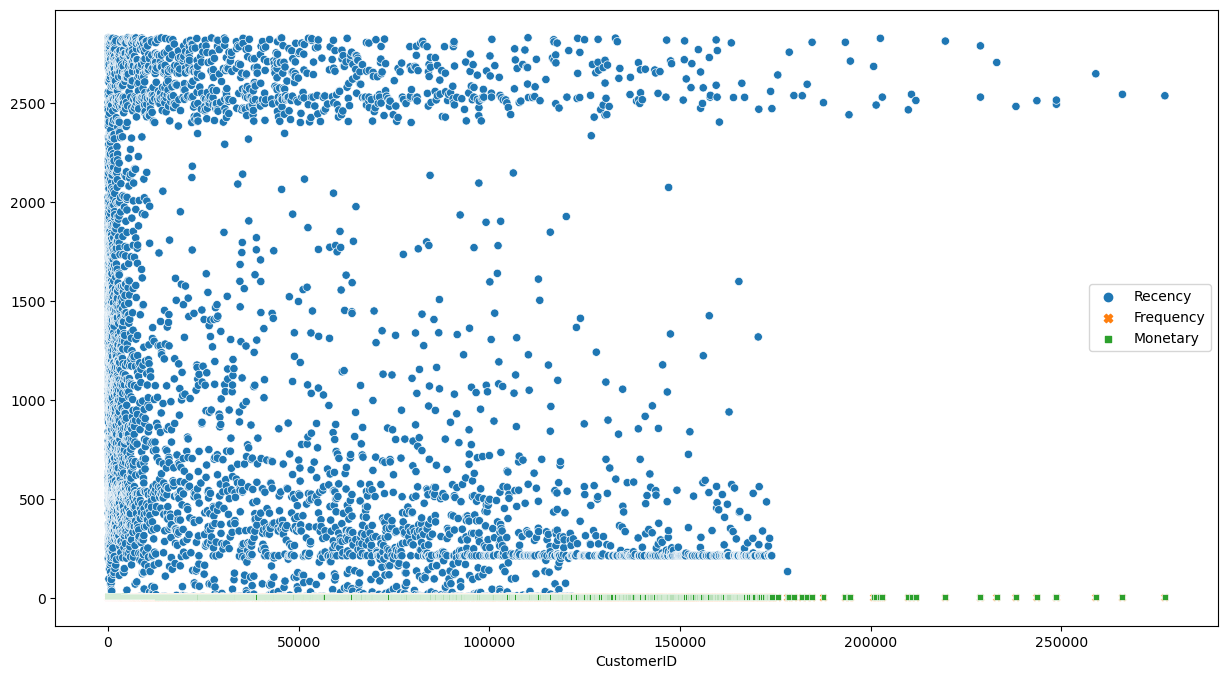

In [121]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = rfm_trans);

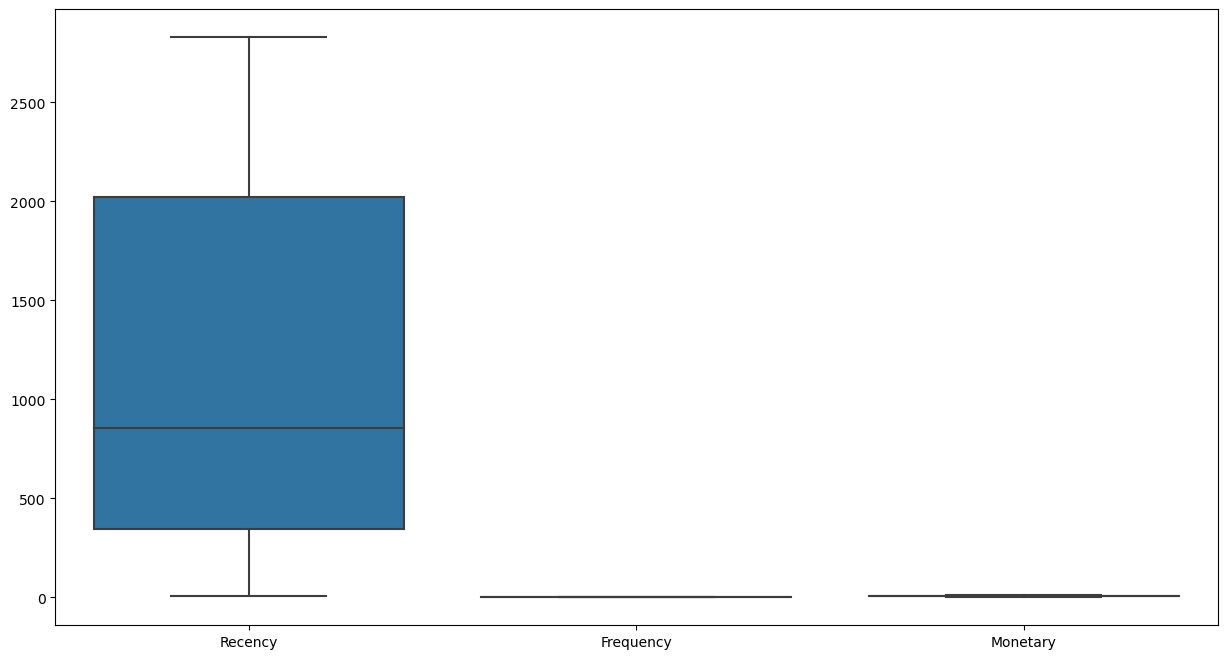

In [122]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = rfm_trans);

In [123]:
rfm_trans.head()

Recency  Frequency  Monetary
CustomerID                              
1               607          1     10.46
2               991          1     10.39
3              1354          1     10.09
4              1856          1      9.83
5              2135          1      9.73

In [124]:
fig = px.scatter_3d(rfm_trans, 
                    x='Recency',
                    y='Frequency',
                    z='Monetary',
                    color='Frequency')
fig.show();

# K-Means Implementation

Defining the Optimal Number of Clusters

In [125]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer

In [126]:

scaler = StandardScaler()
scaler.fit(rfm_trans)

#Store it separately for clustering
rfm_scaled = scaler.transform(rfm_trans)

In [127]:
hopkins(rfm_scaled, rfm_scaled.shape[0])

0.1358920364577501

Elbow method

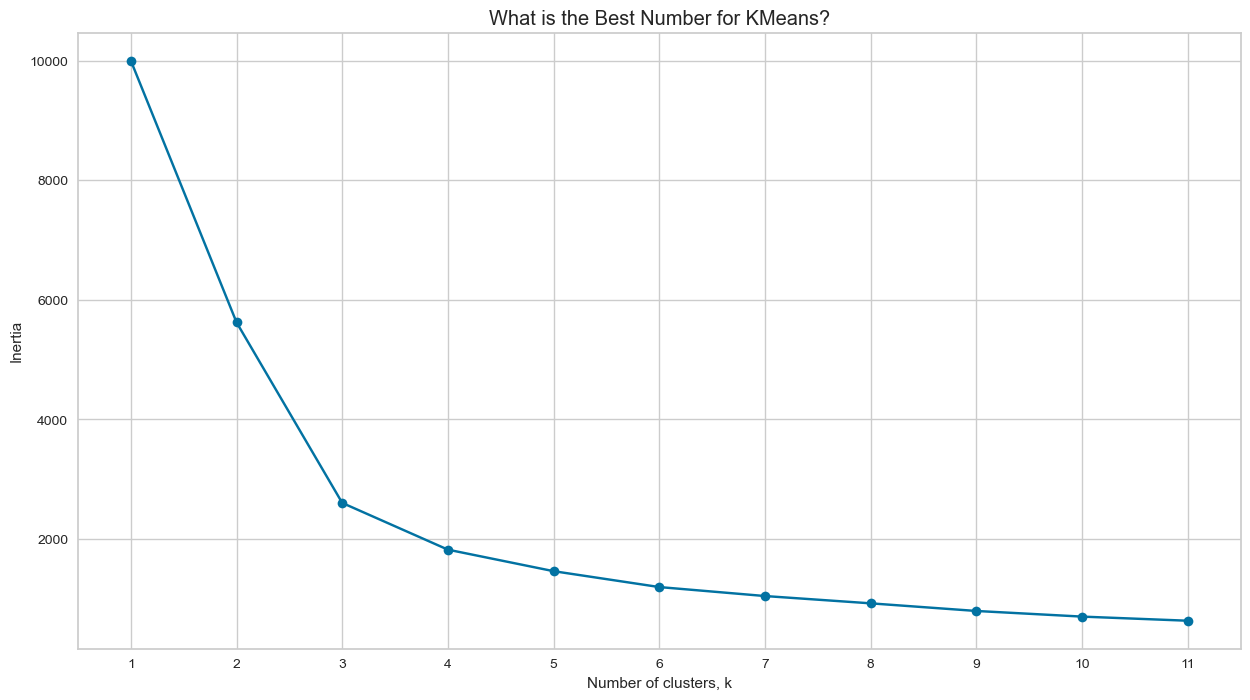

In [128]:
#First : Get the Best KMeans 
ks = range(1, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

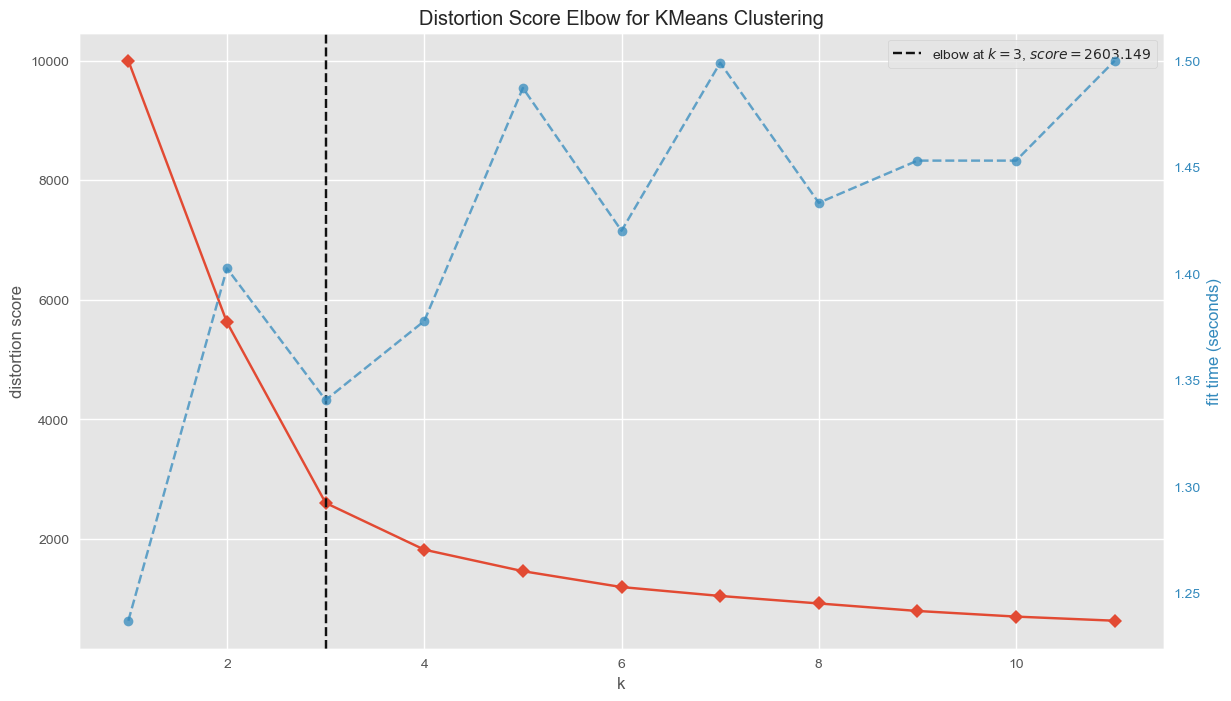

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
# we will use rfm_scaled data from mow instead of rfm_log

plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))

plt.figure(figsize=(14, 8))
visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()

In the visualizer above, the KElbowVisualizer fits the model for a range of RFM clusters values from 1 to 11, which is set by the parameter k=(1, 12). When the model is fit with 3 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since we created our synthetic dataset with 3 clusters of points.

So it can be concluded that according to YellowBrick Elbow method above we are recommended to apply 3 n_clusters for modelling. In addition we will check Classic Elbow Method for a better decision-making

Silhouette Coefficient

In [130]:
ssd =[]

K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(rfm_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(rfm_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.4272259301667606
Silhouette Score for 3 clusters: 0.5340911304037536
Silhouette Score for 4 clusters: 0.4986600697970527
Silhouette Score for 5 clusters: 0.4635311513083525
Silhouette Score for 6 clusters: 0.4271875129049373
Silhouette Score for 7 clusters: 0.41356071280849094
Silhouette Score for 8 clusters: 0.3887863553161886
Silhouette Score for 9 clusters: 0.3999616266683148
Silhouette Score for 10 clusters: 0.3999488449852247
Silhouette Score for 11 clusters: 0.3973738113165211


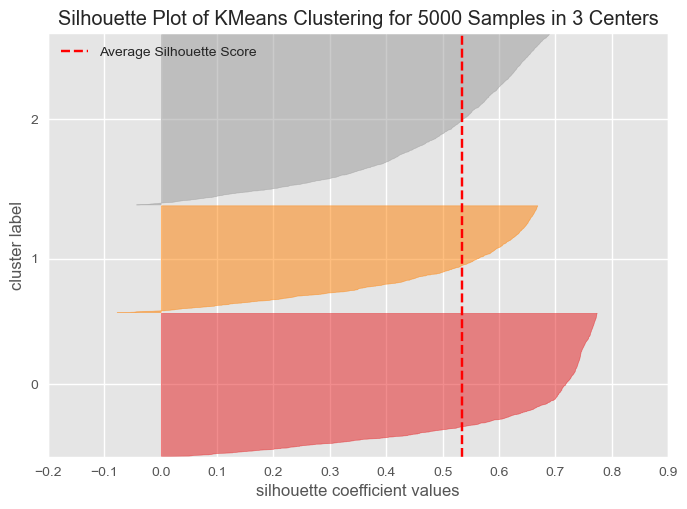

In [131]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model_3)

visualizer.fit(rfm_scaled)    # Fit the data to the visualizer
visualizer.poof();

The Silhouette Coefficient computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

In SilhouetteVisualizer plots, clusters with higher scores have wider silhouettes, but clusters that are less cohesive will fall short of the average score across all clusters, which is plotted as a vertical dotted red line. In other words, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

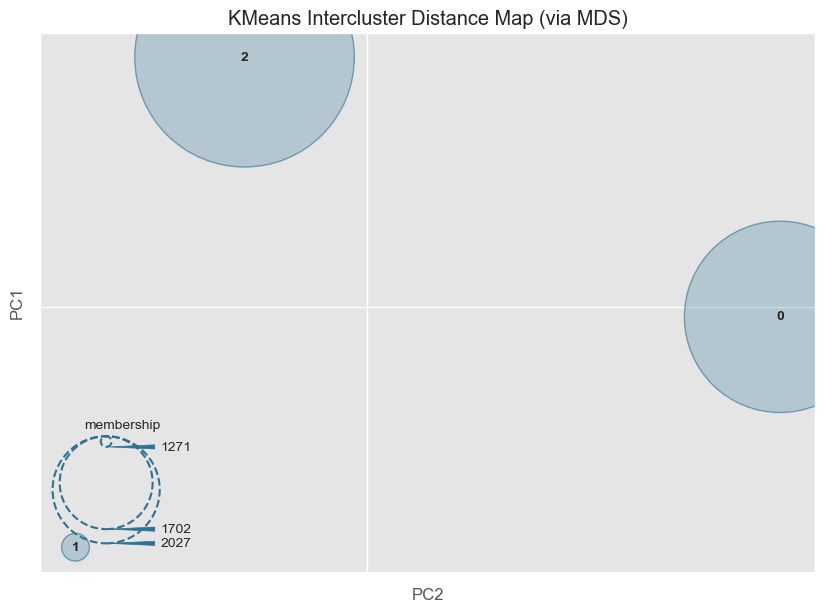

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [132]:
from yellowbrick.cluster import InterclusterDistance
plt.rcParams["figure.figsize"] = (10, 7)

# Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = InterclusterDistance(model_3)

visualizer.fit(rfm_scaled)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved, e.g. the closer two centers are in the visualization, the closer they are in the original feature space.

Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

WATCH OUT: Be careful when determining the number of "n_clusters" and the expressions corresponding to the "labels" or "decision" columns, as my cluster analysis gives different results each time I run my notebook. Please consider the analysis of your own results as I did.

In [133]:
# prediction was added

kmeans = KMeans(n_clusters = 3).fit(rfm_scaled)
kmeans.fit_predict(rfm_scaled)
labels = kmeans.labels_
rfm_trans['ClusterID']=labels
rfm_trans

Recency  Frequency  Monetary  ClusterID
CustomerID                                         
1               607          1     10.46          0
2               991          1     10.39          0
3              1354          1     10.09          0
4              1856          1      9.83          0
5              2135          1      9.73          0
...             ...        ...       ...        ...
248709         2493          1      4.11          2
248710         2514          1      4.11          2
259042         2647          1      3.97          2
266024         2543          1      3.85          2
277160         2536          1      3.68          2

[5000 rows x 4 columns]

In [134]:
rfm_trans.ClusterID.value_counts()

0    2027
1    1702
2    1271
Name: ClusterID, dtype: int64

In [135]:
fig = px.pie(df, values = rfm_trans['ClusterID'].value_counts(), 
             names = (rfm_trans['ClusterID'].value_counts()).index, 
             title = 'Predicted Clusters Distribution')
fig.show()

In [136]:
customer_rfm['ClusterID'] = labels
customer_rfm.sample(20)

Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
1102           2198          1   2918.86              1                1   
107238            7          1    212.50              4                1   
2571            965          1   2093.00              1                1   
5540            523          1   1501.36              1                1   
208             704          1   5289.72              1                1   
351            2658          1   4426.34              1                1   
48790           213          1    435.29              1                1   
9321           2646          1   1183.00              1                1   
80587            17          1    283.99              4                1   
129388          213          1    175.00              1                1   
27603          2668          1    645.63              1                1   
159998          217          1    132.98              1                1   
149199          544          1    145.98              1                1   
3089           2479          1   1934.89              1                1   
81307           213          1    281.29              1                1   
26075           440          1    668.03              1                1   
56322           300          1    388.46              1                1   
166620          213          1    124.99              1                1   
138             526          1   6024.65              1                1   
1292            481          1   2742.85              1                1   

            Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  \
CustomerID                                                                    
1102                     4                114          6  Top Lost Customer   
107238                   1                411          6    Recent Customer   
2571                     4                114          6  Top Lost Customer   
5540                     3                113          5  Top Lost Customer   
208                      4                114          6  Top Lost Customer   
351                      4                114          6  Top Lost Customer   
48790                    2                112          4      Lost Customer   
9321                     3                113          5  Top Lost Customer   
80587                    1                411          6    Recent Customer   
129388                   1                111          3      Lost Customer   
27603                    3                113          5  Top Lost Customer   
159998                   1                111          3      Lost Customer   
149199                   1                111          3      Lost Customer   
3089                     4                114          6  Top Lost Customer   
81307                    1                111          3      Lost Customer   
26075                    3                113          5  Top Lost Customer   
56322                    2                112          4      Lost Customer   
166620                   1                111          3      Lost Customer   
138                      4                114          6  Top Lost Customer   
1292                     4                114          6  Top Lost Customer   

            ClusterID  
CustomerID             
1102                2  
107238              1  
2571                0  
5540                0  
208                 0  
351                 2  
48790               1  
9321                2  
80587               1  
129388              1  
27603               2  
159998              1  
149199              1  
3089                2  
81307               1  
26075               1  
56322               1  
166620              1  
138                 0  
1292                0

 Visualizing the Clusters

1. Create a scatter plot and select cluster centers.

In [137]:
rfm_trans.sample(8)

Recency  Frequency  Monetary  ClusterID
CustomerID                                         
2511            550          1      7.66          0
772             543          1      8.11          0
2849            849          1      7.60          0
104647          641          1      5.39          1
70023           512          1      5.78          1
83172           224          1      5.62          1
52003           303          1      6.03          1
354            1075          1      8.39          0

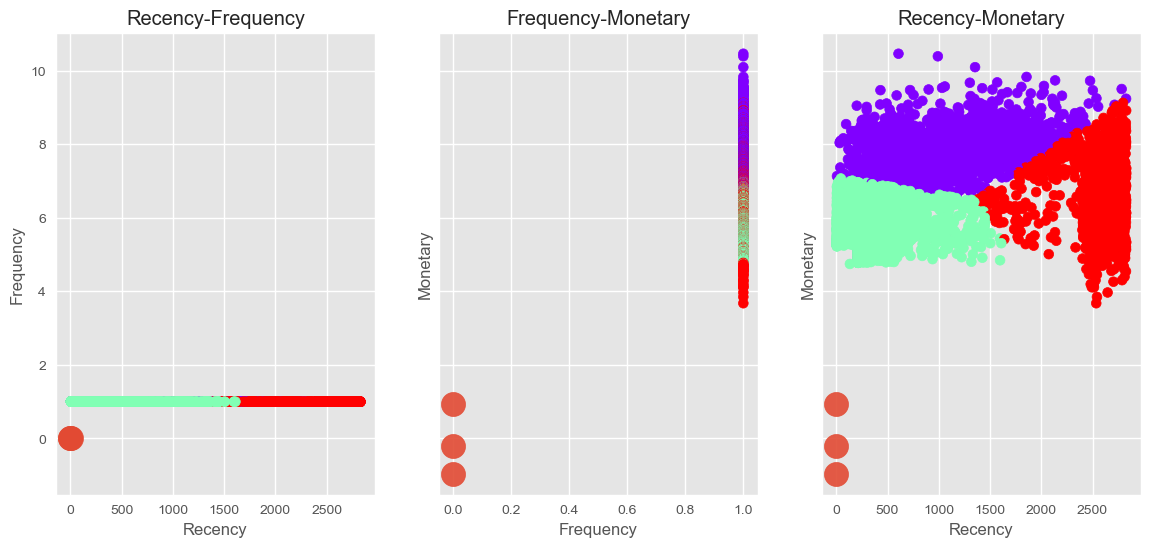

In [138]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 6)) # sharey=True ile y eksen labels lari ortak kullanirlar.

ax1.set_title('Recency-Frequency')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.scatter(rfm_trans.iloc[:, 0], rfm_trans.iloc[:, 1], c=kmeans.labels_, cmap="rainbow")
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=0.9, label = 'Centroids')

ax2.set_title("Frequency-Monetary")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.scatter(rfm_trans.iloc[:, 1], rfm_trans.iloc[:, 2], c=kmeans.labels_,cmap="rainbow")
ax2.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, alpha=0.9, label = 'Centroids')

ax3.set_title("Recency-Monetary")
ax3.set_xlabel('Recency')
ax3.set_ylabel('Monetary')
ax3.scatter(rfm_trans.iloc[:, 0], rfm_trans.iloc[:, 2], c=kmeans.labels_,cmap="rainbow")
ax3.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, alpha=0.9, label = 'Centroids');

sualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results.

In [139]:
rfm_trans.sample(8)

Recency  Frequency  Monetary  ClusterID
CustomerID                                         
64707           137          1      5.85          1
35749          2473          1      6.30          2
6599           1781          1      7.24          2
10910          1791          1      7.00          2
3843           1033          1      7.48          0
4116           2450          1      7.44          2
4              1856          1      9.83          0
70187           711          1      5.78          1

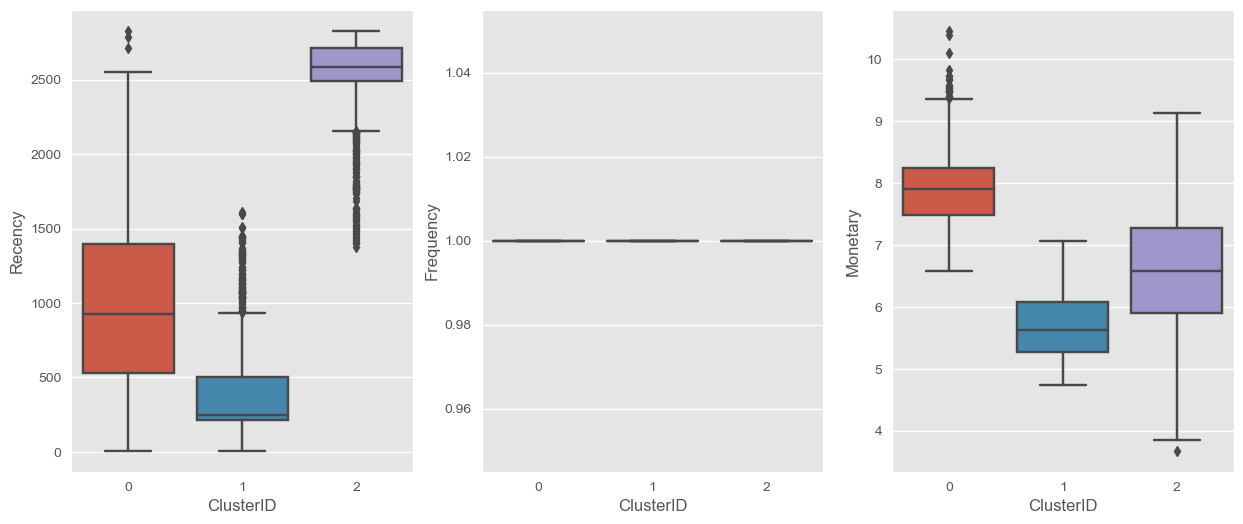

In [140]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
sns.boxplot(rfm_trans['ClusterID'], rfm_trans['Recency'])

plt.subplot(1, 3, 2)
sns.boxplot(rfm_trans['ClusterID'], rfm_trans['Frequency'])

plt.subplot(1, 3, 3)
sns.boxplot(rfm_trans['ClusterID'], rfm_trans['Monetary'])
plt.show()

In [141]:
for i in rfm_trans.drop("ClusterID", axis=1):
    rfm_trans[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

 Assigning the Label

In [142]:
rfm_trans['Labels'] = rfm_trans['ClusterID'].map({0:'Lost/Needed Attention Customers', 1:'Current Custemer', 2:'Top/Best Customer'})
rfm_trans.sample(8) 

Recency  Frequency  Monetary  ClusterID  \
CustomerID                                            
1597           2647          1      7.84          2   
52727           359          1      6.02          1   
976             682          1      8.02          0   
7299           2526          1      7.19          2   
59297           467          1      5.92          1   
8031            292          1      7.15          0   
140625          213          1      5.06          1   
653            1402          1      8.18          0   

                                     Labels  
CustomerID                                   
1597                      Top/Best Customer  
52727                      Current Custemer  
976         Lost/Needed Attention Customers  
7299                      Top/Best Customer  
59297                      Current Custemer  
8031        Lost/Needed Attention Customers  
140625                     Current Custemer  
653         Lost/Needed Attention Customers

In [143]:
rfm_trans[rfm_trans['Labels'] == "Lost/Needed Attention Customers"]

Recency  Frequency  Monetary  ClusterID  \
CustomerID                                            
1               607          1     10.46          0   
2               991          1     10.39          0   
3              1354          1     10.09          0   
4              1856          1      9.83          0   
5              2135          1      9.73          0   
...             ...        ...       ...        ...   
20027          1316          1      6.67          0   
20173          1029          1      6.66          0   
21178          1421          1      6.63          0   
23314          1176          1      6.58          0   
23350          1164          1      6.58          0   

                                     Labels  
CustomerID                                   
1           Lost/Needed Attention Customers  
2           Lost/Needed Attention Customers  
3           Lost/Needed Attention Customers  
4           Lost/Needed Attention Customers  
5           Lost/Needed Attention Customers  
...                                     ...  
20027       Lost/Needed Attention Customers  
20173       Lost/Needed Attention Customers  
21178       Lost/Needed Attention Customers  
23314       Lost/Needed Attention Customers  
23350       Lost/Needed Attention Customers  

[2027 rows x 5 columns]

In [144]:
rfm_trans[rfm_trans['Labels'] == "Top/Best Customer"]


Recency  Frequency  Monetary  ClusterID             Labels
CustomerID                                                            
39             2797          1      9.12          2  Top/Best Customer
59             2731          1      9.03          2  Top/Best Customer
63             2749          1      9.01          2  Top/Best Customer
69             2764          1      8.97          2  Top/Best Customer
77             2714          1      8.92          2  Top/Best Customer
...             ...        ...       ...        ...                ...
248709         2493          1      4.11          2  Top/Best Customer
248710         2514          1      4.11          2  Top/Best Customer
259042         2647          1      3.97          2  Top/Best Customer
266024         2543          1      3.85          2  Top/Best Customer
277160         2536          1      3.68          2  Top/Best Customer

[1271 rows x 5 columns]

In [145]:
rfm_trans[rfm_trans['Labels'] == "Current Custemer"]

Recency  Frequency  Monetary  ClusterID            Labels
CustomerID                                                           
9468             45          1      7.07          1  Current Custemer
10592           157          1      7.01          1  Current Custemer
10898            29          1      7.00          1  Current Custemer
11036           134          1      6.99          1  Current Custemer
11498           209          1      6.97          1  Current Custemer
...             ...        ...       ...        ...               ...
173946          213          1      4.77          1  Current Custemer
173987          213          1      4.77          1  Current Custemer
174004          213          1      4.77          1  Current Custemer
174038          213          1      4.77          1  Current Custemer
178215          133          1      4.74          1  Current Custemer

[1702 rows x 5 columns]

In [146]:
customer_rfm.sample(10)

Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
857             597          1   3220.27              1                1   
42848           161          1    479.00              1                1   
16759          2581          1    869.96              1                1   
115847          213          1    195.99              1                1   
559             726          1   3796.64              1                1   
450            1438          1   4055.97              1                1   
3219            740          1   1900.24              1                1   
66294           305          1    338.49              1                1   
9265           2715          1   1185.69              1                1   
31673          2446          1    590.93              1                1   

            Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  \
CustomerID                                                                    
857                      4                114          6  Top Lost Customer   
42848                    2                112          4      Lost Customer   
16759                    3                113          5  Top Lost Customer   
115847                   1                111          3      Lost Customer   
559                      4                114          6  Top Lost Customer   
450                      4                114          6  Top Lost Customer   
3219                     4                114          6  Top Lost Customer   
66294                    2                112          4      Lost Customer   
9265                     3                113          5  Top Lost Customer   
31673                    2                112          4      Lost Customer   

            ClusterID  
CustomerID             
857                 0  
42848               1  
16759               2  
115847              1  
559                 0  
450                 0  
3219                0  
66294               1  
9265                2  
31673               2

In [147]:
customer_rfm[customer_rfm['ClusterID'] == 0].sample(10)

Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
2232            655          1   2217.35              1                1   
583            2034          1   3760.89              1                1   
10339           394          1   1121.25              1                1   
664            1472          1   3569.46              1                1   
4627           1429          1   1631.84              1                1   
4668           1035          1   1625.12              1                1   
3217            750          1   1901.25              1                1   
14477           677          1    941.19              1                1   
4683            522          1   1622.99              1                1   
1949            591          1   2358.01              1                1   

            Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  \
CustomerID                                                                    
2232                     4                114          6  Top Lost Customer   
583                      4                114          6  Top Lost Customer   
10339                    3                113          5  Top Lost Customer   
664                      4                114          6  Top Lost Customer   
4627                     4                114          6  Top Lost Customer   
4668                     4                114          6  Top Lost Customer   
3217                     4                114          6  Top Lost Customer   
14477                    3                113          5  Top Lost Customer   
4683                     4                114          6  Top Lost Customer   
1949                     4                114          6  Top Lost Customer   

            ClusterID  
CustomerID             
2232                0  
583                 0  
10339               0  
664                 0  
4627                0  
4668                0  
3217                0  
14477               0  
4683                0  
1949                0

In [148]:
customer_rfm[customer_rfm['ClusterID'] == 1].sample(10)

Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
78893           309          1    289.98              1                1   
112911          217          1    200.99              1                1   
97375           284          1    235.08              1                1   
36789           561          1    533.95              1                1   
61995            50          1    358.75              3                1   
88883           213          1    258.19              1                1   
144903          293          1    151.18              1                1   
32548            10          1    579.75              4                1   
100102          498          1    228.98              1                1   
60548           705          1    365.47              1                1   

            Monetary_Score Customer_RFM_Score  RFM_Label    Customer_Category  \
CustomerID                                                                      
78893                    1                111          3        Lost Customer   
112911                   1                111          3        Lost Customer   
97375                    1                111          3        Lost Customer   
36789                    2                112          4        Lost Customer   
61995                    2                312          6  Potential customers   
88883                    1                111          3        Lost Customer   
144903                   1                111          3        Lost Customer   
32548                    2                412          7      Recent Customer   
100102                   1                111          3        Lost Customer   
60548                    2                112          4        Lost Customer   

            ClusterID  
CustomerID             
78893               1  
112911              1  
97375               1  
36789               1  
61995               1  
88883               1  
144903              1  
32548               1  
100102              1  
60548               1

In [149]:
customer_rfm[customer_rfm['ClusterID'] == 2].sample(10)

Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
8606           2806          1   1229.53              1                1   
10919          1978          1   1090.57              1                1   
89333          2542          1    256.84              1                1   
33586          2675          1    567.37              1                1   
6946           2736          1   1357.57              1                1   
95962          2578          1    239.00              1                1   
64220          2694          1    348.00              1                1   
35256          2570          1    549.46              1                1   
32723          2511          1    577.53              1                1   
7864           2684          1   1283.99              1                1   

            Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  \
CustomerID                                                                    
8606                     3                113          5  Top Lost Customer   
10919                    3                113          5  Top Lost Customer   
89333                    1                111          3      Lost Customer   
33586                    2                112          4      Lost Customer   
6946                     3                113          5  Top Lost Customer   
95962                    1                111          3      Lost Customer   
64220                    2                112          4      Lost Customer   
35256                    2                112          4      Lost Customer   
32723                    2                112          4      Lost Customer   
7864                     3                113          5  Top Lost Customer   

            ClusterID  
CustomerID             
8606                2  
10919               2  
89333               2  
33586               2  
6946                2  
95962               2  
64220               2  
35256               2  
32723               2  
7864                2

 Conclusion


- Cluster 0 : The first cluster is more related to the "Lost/Needed Attention Customers" who used to visit and shopping at different frequencies or who are still customer but haven’t been visiting recently. The store/department should bring them back with relevant personalized promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

- Cluster 1 : The second cluster belongs to the "Current Custemer" who have been shopping at different frequencies and spending in varying amounts. The store/department should offer membership or loyalty programs or recommend related products to upsell them and help them become its Loyalists or Champions, and offer renewals and helpful products to encourage another purchase.

- Cluster 2 : The third cluster can be interpreted as "Top/Best Customers" who have been shopping in average frequency or most recently, but spent a good amount. The store/department should reward or offer membership or loyalty programs them to become its Loyalists or Champions.

In [150]:
rfm_trans.shape

(5000, 5)

In [151]:
customer_rfm.shape

(5000, 10)

In [152]:
# column to added from first dataframe to second
extracted_col = rfm_trans['Labels']

# Second dataframe after adding column from first dataframe
customer_rfm.insert(10, "K-Means Predicted Cluster", extracted_col)
# customer_rfm = customer_rfm.join(extracted_col)
customer_rfm['K-Means Predicted Cluster'] = rfm_trans['Labels'].values
customer_rfm.sample(8)

Recency  Frequency  Monetary  Recency_Score  Frequency_Score  \
CustomerID                                                                 
4968           2013          1   1578.95              1                1   
2206            494          1   2228.87              1                1   
3194            705          1   1906.76              1                1   
79288           337          1    288.48              1                1   
15511           427          1    906.41              1                1   
81466           370          1    280.98              1                1   
438            1795          1   4112.21              1                1   
82357           337          1    278.24              1                1   

            Monetary_Score Customer_RFM_Score  RFM_Label  Customer_Category  \
CustomerID                                                                    
4968                     4                114          6  Top Lost Customer   
2206                     4                114          6  Top Lost Customer   
3194                     4                114          6  Top Lost Customer   
79288                    1                111          3      Lost Customer   
15511                    3                113          5  Top Lost Customer   
81466                    1                111          3      Lost Customer   
438                      4                114          6  Top Lost Customer   
82357                    1                111          3      Lost Customer   

            ClusterID        K-Means Predicted Cluster  
CustomerID                                              
4968                2                Top/Best Customer  
2206                0  Lost/Needed Attention Customers  
3194                0  Lost/Needed Attention Customers  
79288               1                 Current Custemer  
15511               1                 Current Custemer  
81466               1                 Current Custemer  
438                 0  Lost/Needed Attention Customers  
82357               1                 Current Custemer

In [153]:
customer_rfm['Customer_Category'].value_counts()

Top Lost Customer                2827
Lost Customer                    1812
Recent Customer                   199
Customer Needed Attention          72
Potential customers                35
Top Customer Needed Attention      33
Top Recent Customer                14
Champions                           8
Name: Customer_Category, dtype: int64

In [154]:
RFM_Customer_Segment = pd.DataFrame(customer_rfm['Customer_Category'].value_counts(dropna=False).sort_values(ascending=False))
RFM_Customer_Segment.reset_index(inplace=True)
RFM_Customer_Segment.rename(columns={'index':'RFM Customer Segment', 'Customer_Category':'The Number Of Customer'}, inplace=True)
RFM_Customer_Segment

RFM Customer Segment  The Number Of Customer
0              Top Lost Customer                    2827
1                  Lost Customer                    1812
2                Recent Customer                     199
3      Customer Needed Attention                      72
4            Potential customers                      35
5  Top Customer Needed Attention                      33
6            Top Recent Customer                      14
7                      Champions                       8

In [155]:
customer_rfm['K-Means Predicted Cluster'].value_counts()

Lost/Needed Attention Customers    2027
Current Custemer                   1702
Top/Best Customer                  1271
Name: K-Means Predicted Cluster, dtype: int64

In [156]:
KMeans_Predicted_Clusters = pd.DataFrame(customer_rfm['K-Means Predicted Cluster'].value_counts(dropna=False).sort_values(ascending=False))
KMeans_Predicted_Clusters.reset_index(inplace=True)
KMeans_Predicted_Clusters.rename(columns={'index':'K-Means Predicted Cluster', 'K-Means Predicted Cluster':'The Number Of Customer'}, inplace=True)
KMeans_Predicted_Clusters

K-Means Predicted Cluster  The Number Of Customer
0  Lost/Needed Attention Customers                    2027
1                 Current Custemer                    1702
2                Top/Best Customer                    1271

In [157]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=customer_rfm['K-Means Predicted Cluster'].values,
    y=customer_rfm['K-Means Predicted Cluster'].index,
    name='Predicted-Clusters By K-Means',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=customer_rfm['Customer_Category'].values,
    y=customer_rfm['Customer_Category'].index,
    name='Customer-Segment By RFM Analysis',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='relative', 
                  xaxis_tickangle=-45, 
                  title="The Comparison of Predicted-Clusters By K-Means vs Customer-Segment By RFM Analysis")
fig.update_traces(dict(marker_line_width=0))
fig.show()